# Final Project File 2
  *  Course: IST 718
  *  Authors: Matthew M Stockhaus; Robert Brian Taylor; Sathish Kumar Rajediran
  *  Prophet Visuals and Modeling
  *  Plotly Map


# Loading and Cleaning the Data

In [ ]:
# ***********************************************************************************
#      import libraries
# ***********************************************************************************

# standard library
import os
import sys
from datetime import datetime
import time
import timeit
import io


# import packages for analysis and modeling
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.stats import uniform  # for training-and-test split
import matplotlib.pyplot as plt  # 2D plotting

import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING

from sklearn.metrics import mean_squared_error
from pandas import DataFrame
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from pandas.plotting import autocorrelation_plot

print('Libraries imported successfully!\n')

os.getcwd()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Libraries imported successfully!



'/content'

In [ ]:
# Connect Colab to Shared Google Drive with Data and Project Files

from google.colab import auth
auth.authenticate_user()

from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
# Load Dataset 1 (Home Inventory)
myfile1 = drive.CreateFile({'id': '1Sz9XMiXXcuadORDn_A8VDgXCsF1SfXwO'})
myfile1.GetContentFile('Metro_invt_fs_uc_sfr_raw_month.csv')

df1 = pd.read_csv('Metro_invt_fs_uc_sfr_raw_month.csv')

# Reviewing the dataset shape and top 5 rows
print(df1.shape)  
print(df1.head(5))

(97, 47)
   RegionID  SizeRank  ... 3/31/2021 4/30/2021
0    102001         0  ...  816408.0  833309.0
1    394913         1  ...   37019.0   38814.0
2    753899         2  ...   17670.0   17393.0
3    394463         3  ...   21090.0   23028.0
4    394514         4  ...   19546.0   20346.0

[5 rows x 47 columns]


In [ ]:
# Does NaN exist?

df1.isna().sum().sum()

# Drop rows with NaN values

# df1.dropna(how = 'any', inplace = True, axis = 0)

16

In [ ]:
# String Split Region Name to get City and State

df1[['City','State']] = df1.RegionName.str.split(",",expand=True)
df1.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,11/30/2017,12/31/2017,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,City,State
0,102001,0,United States,Country,NaN,1370479,1222128,1220989,1238138,1361119,1450641,1520088,1574162,1603663,1597768,1546745,1543807,1433836,1274160,1290638,1289021,1387977,1467761,1544132,1596463,1606448,1586404,1549647,1522106,1380746,1229615,1233235,1235158,1289297,1200554,1292669,1277262,1244231,1188733.0,1135358,1123408,973628,844189,866084.0,757140.0,816408.0,833309.0,United States,None
1,394913,1,"New York, NY",Msa,NY,56733,49779,48723,51987,57209,63410,68152,69973,70170,68631,67192,67437,61884,54679,54903,56884,63407,69460,73159,74604,73388,70434,70049,67222,60403,52589,51591,53686,56652,46955,51052,56679,58247,56138.0,55508,53389,46168,39247,37268.0,36279.0,37019.0,38814.0,New York,NY
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,19212,15753,16973,18756,20790,22077,23951,24933,26347,26554,26179,26719,24958,21304,22088,22391,24150,25050,26359,26441,26783,26017,25232,24567,21167,17282,17827,18966,18974,17057,19717,20992,21656,21527.0,21450,21410,18902,15889,16209.0,16243.0,17670.0,17393.0,Los Angeles-Long Beach-Anaheim,CA
3,394463,3,"Chicago, IL",Msa,IL,33147,28129,27576,29056,33328,35048,37190,39326,40116,39670,38464,38016,34067,29130,28801,30389,34954,37819,39992,41618,41990,42062,41372,39988,35390,30354,30249,32282,33632,29883,32519,33503,32741,31050.0,29073,28307,23906,19914,21961.0,18659.0,21090.0,23028.0,Chicago,IL
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,25462,22175,21743,22303,25472,28747,30426,32508,34422,33825,32598,31853,30179,26844,27504,28115,31224,33067,35141,38326,39185,38222,36561,35708,33042,29514,29387,30396,31506,29792,33268,32932,32042,29519.0,26738,28157,24431,20896,21242.0,18137.0,19546.0,20346.0,Dallas-Fort Worth,TX


In [ ]:
# Drop unncessary columns

df1 = df1.drop(columns = ['SizeRank', 'RegionType', 'RegionName', 'StateName'])
df1.head()

,RegionID,11/30/2017,12/31/2017,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,City,State
0,102001,1370479,1222128,1220989,1238138,1361119,1450641,1520088,1574162,1603663,1597768,1546745,1543807,1433836,1274160,1290638,1289021,1387977,1467761,1544132,1596463,1606448,1586404,1549647,1522106,1380746,1229615,1233235,1235158,1289297,1200554,1292669,1277262,1244231,1188733.0,1135358,1123408,973628,844189,866084.0,757140.0,816408.0,833309.0,United States,None
1,394913,56733,49779,48723,51987,57209,63410,68152,69973,70170,68631,67192,67437,61884,54679,54903,56884,63407,69460,73159,74604,73388,70434,70049,67222,60403,52589,51591,53686,56652,46955,51052,56679,58247,56138.0,55508,53389,46168,39247,37268.0,36279.0,37019.0,38814.0,New York,NY
2,753899,19212,15753,16973,18756,20790,22077,23951,24933,26347,26554,26179,26719,24958,21304,22088,22391,24150,25050,26359,26441,26783,26017,25232,24567,21167,17282,17827,18966,18974,17057,19717,20992,21656,21527.0,21450,21410,18902,15889,16209.0,16243.0,17670.0,17393.0,Los Angeles-Long Beach-Anaheim,CA
3,394463,33147,28129,27576,29056,33328,35048,37190,39326,40116,39670,38464,38016,34067,29130,28801,30389,34954,37819,39992,41618,41990,42062,41372,39988,35390,30354,30249,32282,33632,29883,32519,33503,32741,31050.0,29073,28307,23906,19914,21961.0,18659.0,21090.0,23028.0,Chicago,IL
4,394514,25462,22175,21743,22303,25472,28747,30426,32508,34422,33825,32598,31853,30179,26844,27504,28115,31224,33067,35141,38326,39185,38222,36561,35708,33042,29514,29387,30396,31506,29792,33268,32932,32042,29519.0,26738,28157,24431,20896,21242.0,18137.0,19546.0,20346.0,Dallas-Fort Worth,TX


In [ ]:
df1l = df1.copy()
df1l.head()

,RegionID,11/30/2017,12/31/2017,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,City,State
0,102001,1370479,1222128,1220989,1238138,1361119,1450641,1520088,1574162,1603663,1597768,1546745,1543807,1433836,1274160,1290638,1289021,1387977,1467761,1544132,1596463,1606448,1586404,1549647,1522106,1380746,1229615,1233235,1235158,1289297,1200554,1292669,1277262,1244231,1188733.0,1135358,1123408,973628,844189,866084.0,757140.0,816408.0,833309.0,United States,None
1,394913,56733,49779,48723,51987,57209,63410,68152,69973,70170,68631,67192,67437,61884,54679,54903,56884,63407,69460,73159,74604,73388,70434,70049,67222,60403,52589,51591,53686,56652,46955,51052,56679,58247,56138.0,55508,53389,46168,39247,37268.0,36279.0,37019.0,38814.0,New York,NY
2,753899,19212,15753,16973,18756,20790,22077,23951,24933,26347,26554,26179,26719,24958,21304,22088,22391,24150,25050,26359,26441,26783,26017,25232,24567,21167,17282,17827,18966,18974,17057,19717,20992,21656,21527.0,21450,21410,18902,15889,16209.0,16243.0,17670.0,17393.0,Los Angeles-Long Beach-Anaheim,CA
3,394463,33147,28129,27576,29056,33328,35048,37190,39326,40116,39670,38464,38016,34067,29130,28801,30389,34954,37819,39992,41618,41990,42062,41372,39988,35390,30354,30249,32282,33632,29883,32519,33503,32741,31050.0,29073,28307,23906,19914,21961.0,18659.0,21090.0,23028.0,Chicago,IL
4,394514,25462,22175,21743,22303,25472,28747,30426,32508,34422,33825,32598,31853,30179,26844,27504,28115,31224,33067,35141,38326,39185,38222,36561,35708,33042,29514,29387,30396,31506,29792,33268,32932,32042,29519.0,26738,28157,24431,20896,21242.0,18137.0,19546.0,20346.0,Dallas-Fort Worth,TX


In [ ]:
df1l["RegionID"] = df1l["RegionID"].astype(str)
df1l = df1l.rename(index=str, columns={"RegionID": "ds"}) #used to be ZipCode
df1l.head()

,ds,11/30/2017,12/31/2017,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,City,State
0,102001,1370479,1222128,1220989,1238138,1361119,1450641,1520088,1574162,1603663,1597768,1546745,1543807,1433836,1274160,1290638,1289021,1387977,1467761,1544132,1596463,1606448,1586404,1549647,1522106,1380746,1229615,1233235,1235158,1289297,1200554,1292669,1277262,1244231,1188733.0,1135358,1123408,973628,844189,866084.0,757140.0,816408.0,833309.0,United States,None
1,394913,56733,49779,48723,51987,57209,63410,68152,69973,70170,68631,67192,67437,61884,54679,54903,56884,63407,69460,73159,74604,73388,70434,70049,67222,60403,52589,51591,53686,56652,46955,51052,56679,58247,56138.0,55508,53389,46168,39247,37268.0,36279.0,37019.0,38814.0,New York,NY
2,753899,19212,15753,16973,18756,20790,22077,23951,24933,26347,26554,26179,26719,24958,21304,22088,22391,24150,25050,26359,26441,26783,26017,25232,24567,21167,17282,17827,18966,18974,17057,19717,20992,21656,21527.0,21450,21410,18902,15889,16209.0,16243.0,17670.0,17393.0,Los Angeles-Long Beach-Anaheim,CA
3,394463,33147,28129,27576,29056,33328,35048,37190,39326,40116,39670,38464,38016,34067,29130,28801,30389,34954,37819,39992,41618,41990,42062,41372,39988,35390,30354,30249,32282,33632,29883,32519,33503,32741,31050.0,29073,28307,23906,19914,21961.0,18659.0,21090.0,23028.0,Chicago,IL
4,394514,25462,22175,21743,22303,25472,28747,30426,32508,34422,33825,32598,31853,30179,26844,27504,28115,31224,33067,35141,38326,39185,38222,36561,35708,33042,29514,29387,30396,31506,29792,33268,32932,32042,29519.0,26738,28157,24431,20896,21242.0,18137.0,19546.0,20346.0,Dallas-Fort Worth,TX


In [ ]:
# drop city and state
df1l = df1l.drop(columns = ['City','State'])
df1l = df1l.set_index('ds')
df1l = df1l.T
# convert indices to date time
df1l.index = pd.to_datetime(df1l.index)
df1l.head()

ds,102001,394913,753899,394463,394514,394974,394692,395209,394856,394347,394404,395057,394532,395025,394976,395078,394865,395056,395121,395148,394358,394530,394982,394998,394458,395045,395055,394943,394466,394475,394735,394775,394492,394705,395059,394355,395194,394902,395005,394862,...,395238,394415,394312,394308,394938,394908,394357,394753,394653,394952,394318,394561,394367,394521,394843,394486,394648,394304,753906,394798,395134,394457,395143,394484,395235,395224,395115,394440,394399,395160,394816,394766,394931,394528,394531,394711,394352,394666,395006,394602
2017-11-30,1370479.0,56733.0,19212.0,33147.0,25462.0,27918.0,33271.0,22981.0,29125.0,29787.0,9109.0,4641.0,14993.0,16492.0,25416.0,8206.0,11627.0,5849.0,13287.0,16564.0,13523.0,10664.0,10829.0,8140.0,9568.0,6263.0,11888.0,11123.0,7903.0,11774.0,9723.0,10938.0,5300.0,7539.0,1484.0,8179.0,11059.0,8722.0,5839.0,3139.0,...,2911.0,5113.0,3991.0,2921.0,3134.0,3650.0,2587.0,4467.0,5683.0,1570.0,4062.0,4448.0,3893.0,2979.0,2077.0,5296.0,2988.0,4020.0,7480.0,5121.0,1421.0,5836.0,2795.0,2056.0,2711.0,2830.0,1746.0,10196.0,4001.0,2435.0,2206.0,4034.0,1697.0,4224.0,3666.0,2856.0,3870.0,2660.0,1842.0,2288.0
2017-12-31,1222128.0,49779.0,15753.0,28129.0,22175.0,23603.0,30453.0,19531.0,28367.0,26092.0,6946.0,2966.0,12763.0,14912.0,23187.0,5919.0,8912.0,4872.0,11642.0,15496.0,11682.0,7896.0,9621.0,6418.0,8306.0,4980.0,10511.0,10260.0,6900.0,10208.0,8640.0,9832.0,4431.0,6373.0,1004.0,6751.0,10194.0,7778.0,4914.0,2576.0,...,2392.0,4389.0,3504.0,2500.0,2720.0,3157.0,2319.0,4158.0,4996.0,1327.0,3512.0,4436.0,3730.0,2646.0,2057.0,4969.0,2710.0,3463.0,7410.0,4683.0,1178.0,5322.0,2452.0,1673.0,2433.0,2561.0,1454.0,10319.0,3311.0,2175.0,1804.0,3849.0,1449.0,4029.0,3320.0,2691.0,3581.0,2202.0,1640.0,1859.0
2018-01-31,1220989.0,48723.0,16973.0,27576.0,21743.0,23108.0,31027.0,18262.0,30784.0,26603.0,6347.0,3190.0,12357.0,15715.0,24981.0,5803.0,8527.0,5274.0,11419.0,17100.0,11378.0,8555.0,9431.0,6422.0,8593.0,5010.0,10741.0,11189.0,6786.0,9921.0,8311.0,9894.0,4250.0,6176.0,1163.0,6758.0,9861.0,7658.0,4426.0,2437.0,...,2170.0,4152.0,3498.0,2370.0,2834.0,2849.0,2507.0,4123.0,5302.0,1346.0,3448.0,4426.0,3914.0,2552.0,2114.0,4769.0,2637.0,3326.0,8593.0,4846.0,1201.0,5484.0,2298.0,1832.0,2368.0,2524.0,1324.0,11867.0,3000.0,2179.0,1661.0,4170.0,1550.0,4340.0,3489.0,2785.0,3627.0,2138.0,1693.0,1752.0
2018-02-28,1238138.0,51987.0,18756.0,29056.0,22303.0,24204.0,30765.0,19263.0,31452.0,26485.0,6721.0,4115.0,11570.0,16694.0,25963.0,5696.0,9350.0,5739.0,11516.0,17069.0,11616.0,8915.0,9308.0,6152.0,9079.0,5247.0,11416.0,11126.0,6775.0,9958.0,8400.0,10397.0,4143.0,6151.0,1526.0,7088.0,9965.0,7824.0,4391.0,2449.0,...,2121.0,4139.0,3477.0,2311.0,2771.0,2610.0,2712.0,4013.0,5157.0,1420.0,3373.0,4546.0,4055.0,2613.0,2099.0,4659.0,2746.0,3344.0,8920.0,4687.0,1218.0,5793.0,2263.0,1891.0,2527.0,2431.0,1317.0,12212.0,3062.0,2151.0,1790.0,4168.0,1463.0,4405.0,3514.0,2872.0,3617.0,2114.0,1501.0,1826.0
2018-03-31,1361119.0,57209.0,20790.0,33328.0,25472.0,26604.0,35078.0,23774.0,33153.0,29193.0,8006.0,5316.0,13217.0,17671.0,27694.0,7373.0,11185.0,6700.0,12863.0,18498.0,13102.0,10627.0,9994.0,7140.0,10885.0,6168.0,12520.0,11877.0,7384.0,11080.0,9776.0,11214.0,4815.0,7232.0,2006.0,8330.0,10981.0,8811.0,4785.0,2831.0,...,2405.0,4743.0,3729.0,2518.0,3208.0,2947.0,2901.0,4337.0,5657.0,1666.0,3603.0,4600.0,4413.0,2785.0,2244.0,5121.0,2952.0,3730.0,9285.0,5110.0,1387.0,6452.0,2494.0,2250.0,2912.0,2618.0,1508.0,12942.0,3434.0,2280.0,2189.0,4369.0,1711.0,4657.0,4308.0,3123.0,3788.0,2338.0,1850.0,2178.0


In [ ]:
# Load Dataset 2 (Median List Price)
myfile2 = drive.CreateFile({'id': '1OLJMflIcvQEY8bnLp7OrJ7zbFJfLINqT'})
myfile2.GetContentFile('Metro_mlp_uc_sfr_raw_month.csv')

df2 = pd.read_csv(('Metro_mlp_uc_sfr_raw_month.csv'))

# Reviewing the dataset shape and top 5 rows

print(df2.shape)  
print(df2.head(5))

(97, 47)
   RegionID  SizeRank  ...  3/31/2021  4/30/2021
0    102001         0  ...   350000.0   369990.0
1    394913         1  ...   675000.0   679000.0
2    753899         2  ...  1177500.0  1149900.0
3    394463         3  ...   390000.0   395000.0
4    394514         4  ...   365000.0   375000.0

[5 rows x 47 columns]


In [ ]:
# Does NaN exist?

df2.isna().sum().sum()

# Drop rows with NaN values

# df2.dropna(how = 'any', inplace = True, axis = 0)

45

In [ ]:
# String Split Region Name to get City and State

df2[['City','State']] = df2.RegionName.str.split(",",expand=True)
df2.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,11/30/2017,12/31/2017,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,City,State
0,102001,0,United States,Country,NaN,274500,269900,269900,278000,289000,298000,299900,299900,299500,299000,297000,295000,290000,289700,289900,297500,304900,315000,323900,324800,319900,315000,310000,308900,299990,299000,299000,300000,315000,319000,329000,339000,340000,340000,340000.0,339900,335000.0,329250,327658.0,338990.0,350000.0,369990.0,United States,None
1,394913,1,"New York, NY",Msa,NY,499999,499900,499990,525000,538000,549000,549900,550000,549000,549000,549000,549000,539900,534500,529000,540000,549900,559900,569000,569000,560000,559000,560000,564900,559999,563500,560000,574900,595000,589999,599000,599999,625000,639000,645000.0,649000,649000.0,650000,659000.0,669000.0,675000.0,679000.0,New York,NY
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,839900,849000,849888,851888,888888,899000,899000,890000,869000,839000,825000,815000,799900,799000,795000,800000,849000,879000,899000,900550,912000,905000,899000,899999,915000,920000,929900,969000,990000,938000,950000,999000,1095000,1117851,1099000.0,1100000,1148000.0,1175000,1175000.0,1180000.0,1177500.0,1149900.0,Los Angeles-Long Beach-Anaheim,CA
3,394463,3,"Chicago, IL",Msa,IL,315000,300000,303990,329000,349900,360000,365000,359333,349900,345000,339900,329900,324900,311900,312890,329900,349000,359000,359900,356450,349900,339900,335000,329000,319900,314900,314990,329900,345000,344500,349900,360000,369900,374990,375000.0,372900,365000.0,359900,349900.0,375000.0,390000.0,395000.0,Chicago,IL
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,341345,344900,347375,354900,361575,369900,369900,359900,350000,345000,340000,340000,339900,336000,334900,340000,349990,359000,361500,358900,349900,346000,344900,344900,342900,339000,335000,339500,344269,340000,349999,359900,364800,364900,365000.0,359900,355000.0,352000,350000.0,357575.0,365000.0,375000.0,Dallas-Fort Worth,TX


In [ ]:
# Drop unncessary columns

df2 = df2.drop(columns = ['SizeRank', 'RegionType', 'RegionName', 'StateName'])
df2.head()

,RegionID,11/30/2017,12/31/2017,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,City,State
0,102001,274500,269900,269900,278000,289000,298000,299900,299900,299500,299000,297000,295000,290000,289700,289900,297500,304900,315000,323900,324800,319900,315000,310000,308900,299990,299000,299000,300000,315000,319000,329000,339000,340000,340000,340000.0,339900,335000.0,329250,327658.0,338990.0,350000.0,369990.0,United States,None
1,394913,499999,499900,499990,525000,538000,549000,549900,550000,549000,549000,549000,549000,539900,534500,529000,540000,549900,559900,569000,569000,560000,559000,560000,564900,559999,563500,560000,574900,595000,589999,599000,599999,625000,639000,645000.0,649000,649000.0,650000,659000.0,669000.0,675000.0,679000.0,New York,NY
2,753899,839900,849000,849888,851888,888888,899000,899000,890000,869000,839000,825000,815000,799900,799000,795000,800000,849000,879000,899000,900550,912000,905000,899000,899999,915000,920000,929900,969000,990000,938000,950000,999000,1095000,1117851,1099000.0,1100000,1148000.0,1175000,1175000.0,1180000.0,1177500.0,1149900.0,Los Angeles-Long Beach-Anaheim,CA
3,394463,315000,300000,303990,329000,349900,360000,365000,359333,349900,345000,339900,329900,324900,311900,312890,329900,349000,359000,359900,356450,349900,339900,335000,329000,319900,314900,314990,329900,345000,344500,349900,360000,369900,374990,375000.0,372900,365000.0,359900,349900.0,375000.0,390000.0,395000.0,Chicago,IL
4,394514,341345,344900,347375,354900,361575,369900,369900,359900,350000,345000,340000,340000,339900,336000,334900,340000,349990,359000,361500,358900,349900,346000,344900,344900,342900,339000,335000,339500,344269,340000,349999,359900,364800,364900,365000.0,359900,355000.0,352000,350000.0,357575.0,365000.0,375000.0,Dallas-Fort Worth,TX


In [ ]:
df2l = df2.copy()
df2l.head()

,RegionID,11/30/2017,12/31/2017,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,City,State
0,102001,274500,269900,269900,278000,289000,298000,299900,299900,299500,299000,297000,295000,290000,289700,289900,297500,304900,315000,323900,324800,319900,315000,310000,308900,299990,299000,299000,300000,315000,319000,329000,339000,340000,340000,340000.0,339900,335000.0,329250,327658.0,338990.0,350000.0,369990.0,United States,None
1,394913,499999,499900,499990,525000,538000,549000,549900,550000,549000,549000,549000,549000,539900,534500,529000,540000,549900,559900,569000,569000,560000,559000,560000,564900,559999,563500,560000,574900,595000,589999,599000,599999,625000,639000,645000.0,649000,649000.0,650000,659000.0,669000.0,675000.0,679000.0,New York,NY
2,753899,839900,849000,849888,851888,888888,899000,899000,890000,869000,839000,825000,815000,799900,799000,795000,800000,849000,879000,899000,900550,912000,905000,899000,899999,915000,920000,929900,969000,990000,938000,950000,999000,1095000,1117851,1099000.0,1100000,1148000.0,1175000,1175000.0,1180000.0,1177500.0,1149900.0,Los Angeles-Long Beach-Anaheim,CA
3,394463,315000,300000,303990,329000,349900,360000,365000,359333,349900,345000,339900,329900,324900,311900,312890,329900,349000,359000,359900,356450,349900,339900,335000,329000,319900,314900,314990,329900,345000,344500,349900,360000,369900,374990,375000.0,372900,365000.0,359900,349900.0,375000.0,390000.0,395000.0,Chicago,IL
4,394514,341345,344900,347375,354900,361575,369900,369900,359900,350000,345000,340000,340000,339900,336000,334900,340000,349990,359000,361500,358900,349900,346000,344900,344900,342900,339000,335000,339500,344269,340000,349999,359900,364800,364900,365000.0,359900,355000.0,352000,350000.0,357575.0,365000.0,375000.0,Dallas-Fort Worth,TX


In [ ]:
df2l["RegionID"] = df2l["RegionID"].astype(str)
df2l = df2l.rename(index=str, columns={"RegionID": "ds"}) #used to be ZipCode
df2l.head()

,ds,11/30/2017,12/31/2017,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,City,State
0,102001,274500,269900,269900,278000,289000,298000,299900,299900,299500,299000,297000,295000,290000,289700,289900,297500,304900,315000,323900,324800,319900,315000,310000,308900,299990,299000,299000,300000,315000,319000,329000,339000,340000,340000,340000.0,339900,335000.0,329250,327658.0,338990.0,350000.0,369990.0,United States,None
1,394913,499999,499900,499990,525000,538000,549000,549900,550000,549000,549000,549000,549000,539900,534500,529000,540000,549900,559900,569000,569000,560000,559000,560000,564900,559999,563500,560000,574900,595000,589999,599000,599999,625000,639000,645000.0,649000,649000.0,650000,659000.0,669000.0,675000.0,679000.0,New York,NY
2,753899,839900,849000,849888,851888,888888,899000,899000,890000,869000,839000,825000,815000,799900,799000,795000,800000,849000,879000,899000,900550,912000,905000,899000,899999,915000,920000,929900,969000,990000,938000,950000,999000,1095000,1117851,1099000.0,1100000,1148000.0,1175000,1175000.0,1180000.0,1177500.0,1149900.0,Los Angeles-Long Beach-Anaheim,CA
3,394463,315000,300000,303990,329000,349900,360000,365000,359333,349900,345000,339900,329900,324900,311900,312890,329900,349000,359000,359900,356450,349900,339900,335000,329000,319900,314900,314990,329900,345000,344500,349900,360000,369900,374990,375000.0,372900,365000.0,359900,349900.0,375000.0,390000.0,395000.0,Chicago,IL
4,394514,341345,344900,347375,354900,361575,369900,369900,359900,350000,345000,340000,340000,339900,336000,334900,340000,349990,359000,361500,358900,349900,346000,344900,344900,342900,339000,335000,339500,344269,340000,349999,359900,364800,364900,365000.0,359900,355000.0,352000,350000.0,357575.0,365000.0,375000.0,Dallas-Fort Worth,TX


In [ ]:
# drop city and state
df2l = df2l.drop(columns = ['City','State'])
df2l = df2l.set_index('ds')
df2l = df2l.T
# convert indices to date time
df2l.index = pd.to_datetime(df2l.index)
df2l.head()

ds,102001,394913,753899,394463,394514,394974,394692,395209,394856,394347,394404,395057,394532,395025,394976,395078,394865,395056,395121,395148,394358,394530,394982,394998,394458,395045,395055,394943,394466,394475,394735,394775,394492,394705,395059,394355,395194,394902,395005,394862,...,395238,394415,394312,394308,394938,394908,394357,394753,394653,394952,394318,394561,394367,394521,394843,394486,394648,394304,753906,394798,395134,394457,395143,394484,395235,395224,395115,394440,394399,395160,394816,394766,394931,394528,394531,394711,394352,394666,395006,394602
2017-11-30,274500.0,499999.0,839900.0,315000.0,341345.0,259000.0,325000.0,450000.0,464900.0,310130.0,559900.0,849900.0,228500.0,399900.0,332500.0,515000.0,346247.0,735000.0,195000.0,279900.0,315400.0,539900.0,169900.0,487000.0,339900.0,476535.0,280000.0,318742.0,229900.0,173939.0,255000.0,299999.0,250000.0,214999.0,1100000.0,368463.0,279000.0,388677.0,365524.0,214900.0,...,312443.0,778366.0,248900.0,234624.0,271064.0,295250.0,248854.0,274900.0,256323.0,829000.0,231442.0,181708.0,242000.0,145504.0,198000.0,193218.0,189100.0,149900.0,369000.0,165045.0,363257.0,370892.0,131334.0,477121.0,217000.0,177900.0,242614.0,257609.0,309900.0,129900.0,299900.0,225000.0,340542.0,269000.0,285661.0,233667.0,221900.0,211617.0,392261.0,454196.0
2017-12-31,269900.0,499900.0,849000.0,300000.0,344900.0,249900.0,325000.0,439500.0,464901.0,311700.0,549900.0,799888.0,219000.0,399999.0,335000.0,519950.0,366293.0,749000.0,189900.0,279900.0,305000.0,567874.0,165000.0,489950.0,335000.0,476535.0,284990.0,315900.0,224000.0,167753.0,252000.0,303000.0,259000.0,209900.0,1099000.0,366002.0,277000.0,388677.0,364556.0,204500.0,...,312443.0,778366.0,247000.0,237899.0,276135.0,292000.0,248420.0,269900.0,256322.0,829000.0,231339.0,181708.0,239900.0,133812.0,194900.0,191332.0,185704.0,146900.0,374000.0,169632.0,366686.0,370057.0,131334.0,489735.0,217990.0,177400.0,247187.0,264715.0,327990.0,124900.0,299900.0,227000.0,340542.0,269000.0,285759.0,235933.0,219900.0,209241.0,390496.0,456736.0
2018-01-31,269900.0,499990.0,849888.0,303990.0,347375.0,245000.0,325000.0,439900.0,460000.0,316899.0,550000.0,799000.0,212900.0,402990.0,344950.0,545000.0,383086.0,749900.0,189900.0,279500.0,299990.0,579900.0,163900.0,495000.0,339000.0,480634.0,283968.0,319900.0,225000.0,170899.0,262000.0,305000.0,269900.0,215000.0,1095000.0,363832.0,275000.0,388677.0,365524.0,200000.0,...,312443.0,850764.0,249000.0,244559.0,281055.0,299900.0,248516.0,265000.0,256230.0,828000.0,225270.0,181118.0,239000.0,137373.0,195000.0,189935.0,185704.0,139900.0,371000.0,169724.0,371448.0,370057.0,131334.0,479810.0,219900.0,180000.0,240656.0,265301.0,339900.0,124900.0,319000.0,225000.0,350861.0,268000.0,290686.0,231307.0,224900.0,214899.0,402587.0,467971.0
2018-02-28,278000.0,525000.0,851888.0,329000.0,354900.0,250000.0,332500.0,449990.0,465000.0,325000.0,585000.0,895000.0,220000.0,410000.0,349999.0,579900.0,398724.0,775000.0,196900.0,281329.0,302990.0,588000.0,165000.0,500000.0,340000.0,491804.0,284242.0,325000.0,240000.0,176036.0,269950.0,309000.0,299850.0,228900.0,1198000.0,373282.0,275000.0,393863.0,375310.0,219900.0,...,328175.0,917491.0,250000.0,250018.0,295716.0,315000.0,257978.0,269900.0,260984.0,829900.0,231339.0,182137.0,240000.0,138064.0,195000.0,196968.0,203448.0,139900.0,375000.0,173394.0,370496.0,380166.0,137554.0,474356.0,224900.0,195500.0,251013.0,265418.0,359900.0,124900.0,329900.0,229000.0,366237.0,272000.0,295613.0,231307.0,229000.0,223500.0,423238.0,464063.0
2018-03-31,289000.0,538000.0,888888.0,349900.0,361575.0,260000.0,339000.0,470000.0,474900.0,339900.0,619990.0,949900.0,240000.0,419999.0,359900.0,619000.0,409220.0,777000.0,208300.0,289900.0,319988.0,585000.0,172900.0,524900.0,350000.0,502052.0,289900.0,335000.0,259900.0,183480.0,279950.0,310000.0,300000.0,249900.0,1279000.0,377062.0,284900.0,397987.0,386064.0,234900.0,...,333279.0,939733.0,259900.0,251001.0,301238.0,329900.0,266676.0,279900.0,269455.0,829900.0,241728.0,182190.0,24900

In [ ]:
# Load Dataset 3 (SFR Home Value 1996 - 2020)
myfile3 = drive.CreateFile({'id': '13PmZHh_kS163Ziyp-43JAfCJwo3lY3Ij'})
myfile3.GetContentFile('Zip_Zhvi_SingleFamilyResidence.csv')

df3 = pd.read_csv(('Zip_Zhvi_SingleFamilyResidence.csv'), encoding = 'ISO-8859-1', dtype={'RegionName': 'str'})

# Reviewing the dataset shape and top 5 rows

print(df3.shape)  
print(df3.head(5))

(30464, 300)
   RegionID  SizeRank RegionName  ... 2020-01-31 2020-02-29 2020-03-31
0     61639         0      10025  ...  1381453.0  1385737.0  1389268.0
1     84654         1      60657  ...   972038.0   973671.0   975642.0
2     61637         2      10023  ...  1478980.0  1479301.0  1474994.0
3     91982         3      77494  ...   335860.0   336037.0   336483.0
4     84616         4      60614  ...  1198277.0  1199900.0  1200980.0

[5 rows x 300 columns]


In [ ]:
# Does NaN exist?

df3.isna().sum().sum()

# Drop rows with NaN values

# df3.dropna(how = 'any', inplace = True, axis = 0)

2117876

In [ ]:
# Drop unncessary columns

df3 = df3.drop(columns = ['SizeRank', 'RegionType', 'StateName', 'Metro', 'CountyName'])
df3.head()

,RegionID,RegionName,State,City,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,...,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
0,61639,10025,NY,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1524562.0,1525605.0,1525955.0,1528604.0,1527843.0,1530509.0,1525013.0,1531236.0,1532307.0,1543260.0,1534946.0,1527048.0,1508495.0,1498638.0,1494872.0,1487969.0,1480591.0,1471324.0,1462476.0,1456223.0,1448110.0,1446622.0,1451579.0,1452858.0,1453112.0,1439554.0,1426900.0,1416568.0,1415022.0,1414474.0,1413747.0,1405862.0,1402547.0,1390420.0,1381621.0,1375725.0,1374714.0,1381453.0,1385737.0,1389268.0
1,84654,60657,IL,Chicago,364892.0,364162.0,363605.0,362963.0,361660.0,361342.0,360662.0,361804.0,363561.0,366592.0,370077.0,372842.0,376806.0,380122.0,384081.0,385663.0,389062.0,389359.0,390182.0,388087.0,385729.0,381688.0,377848.0,376493.0,374914.0,375094.0,375012.0,378067.0,380789.0,386605.0,392801.0,400292.0,408057.0,416827.0,425087.0,432120.0,...,958178.0,956528.0,951529.0,955244.0,958096.0,959882.0,958726.0,956879.0,958371.0,961171.0,960878.0,957985.0,958428.0,964051.0,969547.0,968807.0,968566.0,969572.0,972936.0,973010.0,972447.0,972684.0,975094.0,978629.0,981362.0,979667.0,976810.0,975419.0,975366.0,975741.0,974693.0,975616.0,975734.0,975251.0,974238.0,973104.0,971908.0,972038.0,973671.0,975642.0
2,61637,10023,NY,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1669910.0,1661199.0,1639318.0,1622378.0,1613382.0,1611625.0,1609075.0,1611388.0,1615755.0,1619823.0,1609176.0,1597282.0,1581756.0,1572273.0,1573601.0,1578799.0,1585506.0,1587796.0,1591265.0,1596660.0,1598258.0,1596017.0,1595032.0,1592948.0,1590038.0,1576594.0,1562766.0,1552128.0,1545711.0,1540137.0,1528603.0,1514894.0,1502233.0,1492429.0,1486122.0,1480426.0,1476509.0,1478980.0,1479301.0,1474994.0
3,91982,77494,TX,Katy,200475.0,200723.0,200526.0,199337.0,198200.0,197534.0,198298.0,197986.0,197333.0,196543.0,197444.0,199129.0,201687.0,202931.0,204207.0,206413.0,208870.0,210582.0,210250.0,212394.0,214904.0,217109.0,216177.0,214468.0,211736.0,210126.0,208420.0,207481.0,206443.0,206033.0,205925.0,204647.0,204133.0,204600.0,206225.0,207084.0,...,331031.0,330770.0,331485.0,332276.0,332365.0,331319.0,331016.0,331256.0,331356.0,331165.0,331177.0,331223.0,332171.0,333159.0,333470.0,333247.0,333699.0,334667.0,335386.0,335194.0,335478.0,335777.0,336150.0,336558.0,336390.0,336776.0,336806.0,336869.0,336217.0,335679.0,335536.0,335878.0,335940.0,336092.0,336119.0,336083.0,336154.0,335860.0,336037.0,336483.0
4,84616,60614,IL,Chicago,546663.0,546231.0,545451.0,545391.0,543066.0,543084.0,542380.0,545254.0,548142.0,552660.0,557791.0,562238.0,566446.0,569659.0,573409.0,575403.0,581567.0,584316.0,587753.0,585957.0,583932.0,580996.0,578241.0,578355.0,580711.0,585527.0,591659.0,597955.0,604759.0,611702.0,620591.0,630536.0,643350.0,654584.0,665638.0,674824.0,...,1173759.0,1175981.0,1174668.0,1182530.0,1188431.0,1192806.0,1193344.0,1191314.0,1192626.0,1196983.0,1199400.0,1199387.0,1202485.0,1208903.0,1213170.0,1209707.0,1207080.0,1206948.0,1208617.0,1208706.0,1208

In [ ]:
# Rename columns

df3 = df3.rename(columns = {"RegionName":"Zip1"})
df3.head()

,RegionID,Zip1,State,City,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,...,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
0,61639,10025,NY,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1524562.0,1525605.0,1525955.0,1528604.0,1527843.0,1530509.0,1525013.0,1531236.0,1532307.0,1543260.0,1534946.0,1527048.0,1508495.0,1498638.0,1494872.0,1487969.0,1480591.0,1471324.0,1462476.0,1456223.0,1448110.0,1446622.0,1451579.0,1452858.0,1453112.0,1439554.0,1426900.0,1416568.0,1415022.0,1414474.0,1413747.0,1405862.0,1402547.0,1390420.0,1381621.0,1375725.0,1374714.0,1381453.0,1385737.0,1389268.0
1,84654,60657,IL,Chicago,364892.0,364162.0,363605.0,362963.0,361660.0,361342.0,360662.0,361804.0,363561.0,366592.0,370077.0,372842.0,376806.0,380122.0,384081.0,385663.0,389062.0,389359.0,390182.0,388087.0,385729.0,381688.0,377848.0,376493.0,374914.0,375094.0,375012.0,378067.0,380789.0,386605.0,392801.0,400292.0,408057.0,416827.0,425087.0,432120.0,...,958178.0,956528.0,951529.0,955244.0,958096.0,959882.0,958726.0,956879.0,958371.0,961171.0,960878.0,957985.0,958428.0,964051.0,969547.0,968807.0,968566.0,969572.0,972936.0,973010.0,972447.0,972684.0,975094.0,978629.0,981362.0,979667.0,976810.0,975419.0,975366.0,975741.0,974693.0,975616.0,975734.0,975251.0,974238.0,973104.0,971908.0,972038.0,973671.0,975642.0
2,61637,10023,NY,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1669910.0,1661199.0,1639318.0,1622378.0,1613382.0,1611625.0,1609075.0,1611388.0,1615755.0,1619823.0,1609176.0,1597282.0,1581756.0,1572273.0,1573601.0,1578799.0,1585506.0,1587796.0,1591265.0,1596660.0,1598258.0,1596017.0,1595032.0,1592948.0,1590038.0,1576594.0,1562766.0,1552128.0,1545711.0,1540137.0,1528603.0,1514894.0,1502233.0,1492429.0,1486122.0,1480426.0,1476509.0,1478980.0,1479301.0,1474994.0
3,91982,77494,TX,Katy,200475.0,200723.0,200526.0,199337.0,198200.0,197534.0,198298.0,197986.0,197333.0,196543.0,197444.0,199129.0,201687.0,202931.0,204207.0,206413.0,208870.0,210582.0,210250.0,212394.0,214904.0,217109.0,216177.0,214468.0,211736.0,210126.0,208420.0,207481.0,206443.0,206033.0,205925.0,204647.0,204133.0,204600.0,206225.0,207084.0,...,331031.0,330770.0,331485.0,332276.0,332365.0,331319.0,331016.0,331256.0,331356.0,331165.0,331177.0,331223.0,332171.0,333159.0,333470.0,333247.0,333699.0,334667.0,335386.0,335194.0,335478.0,335777.0,336150.0,336558.0,336390.0,336776.0,336806.0,336869.0,336217.0,335679.0,335536.0,335878.0,335940.0,336092.0,336119.0,336083.0,336154.0,335860.0,336037.0,336483.0
4,84616,60614,IL,Chicago,546663.0,546231.0,545451.0,545391.0,543066.0,543084.0,542380.0,545254.0,548142.0,552660.0,557791.0,562238.0,566446.0,569659.0,573409.0,575403.0,581567.0,584316.0,587753.0,585957.0,583932.0,580996.0,578241.0,578355.0,580711.0,585527.0,591659.0,597955.0,604759.0,611702.0,620591.0,630536.0,643350.0,654584.0,665638.0,674824.0,...,1173759.0,1175981.0,1174668.0,1182530.0,1188431.0,1192806.0,1193344.0,1191314.0,1192626.0,1196983.0,1199400.0,1199387.0,1202485.0,1208903.0,1213170.0,1209707.0,1207080.0,1206948.0,1208617.0,1208706.0,1208528.0,

In [ ]:
# Load Dataset 4 (Employment - Population Ratio 2001 - 2021)
myfile4 = drive.CreateFile({'id': '1wTvjABa1VRQHnfxXpQnRsCcbvNukHTB8'})
myfile4.GetContentFile('Emp_Pop_Ratio_20_Years.csv')

df4 = pd.read_csv(('Emp_Pop_Ratio_20_Years.csv'))
df4.head()

,DATE,EMRATIO
0,2001-04-01,64.0
1,2001-05-01,63.8
2,2001-06-01,63.7
3,2001-07-01,63.7
4,2001-08-01,63.2


In [ ]:
# Add Prefix for easier merging

df4 = df4.add_prefix('em_')
df4.head()

,em_DATE,em_EMRATIO
0,2001-04-01,64.0
1,2001-05-01,63.8
2,2001-06-01,63.7
3,2001-07-01,63.7
4,2001-08-01,63.2


In [ ]:
# Load Dataset 5 (Unemployment Rate 2001 - 2021)
myfile5 = drive.CreateFile({'id': '1H9595HHOPqt_EJLTEZ38hXznrrBD8ueP'})
myfile5.GetContentFile('Unemp_Rate_20_Years.csv')

df5 = pd.read_csv(('Unemp_Rate_20_Years.csv'))
df5.head()

,DATE,UNRATE
0,2001-04-01,4.4
1,2001-05-01,4.3
2,2001-06-01,4.5
3,2001-07-01,4.6
4,2001-08-01,4.9


In [ ]:
# Add Prefix for easier merging

df5 = df5.add_prefix('unem_')
df5.head()

,unem_DATE,unem_UNRATE
0,2001-04-01,4.4
1,2001-05-01,4.3
2,2001-06-01,4.5
3,2001-07-01,4.6
4,2001-08-01,4.9


In [ ]:
# Load Dataset 6 (15YR Fixed Mortgage Average 2001 - 2021)
myfile6 = drive.CreateFile({'id': '1ftf-kgJg7zjBFvyX3Wv2xeaAVLVGrWZL'})
myfile6.GetContentFile('15YR_Fixed_Mortg_Avg_20_Years.csv')

df6 = pd.read_csv(('15YR_Fixed_Mortg_Avg_20_Years.csv'))
df6.head()

,DATE,MORTGAGE15US
0,2001-04-06,6.54
1,2001-04-13,6.55
2,2001-04-20,6.66
3,2001-04-27,6.63
4,2001-05-04,6.66


In [ ]:
# Add Prefix for easier merging

df6 = df6.add_prefix('15_')
df6.head()

,15_DATE,15_MORTGAGE15US
0,2001-04-06,6.54
1,2001-04-13,6.55
2,2001-04-20,6.66
3,2001-04-27,6.63
4,2001-05-04,6.66


In [ ]:
# Load Dataset 7 (30YR Fixed Mortgage Average 2001 - 2021)
myfile7 = drive.CreateFile({'id': '1ppoXePZCgRn8BgUqzAivR_xQa9sklJVm'})
myfile7.GetContentFile('30YR_Fixed_Mortg_Avg_20_Years.csv')

df7 = pd.read_csv(('30YR_Fixed_Mortg_Avg_20_Years.csv'))
df7.head()

,DATE,MORTGAGE30US
0,2001-04-06,7.01
1,2001-04-13,7.04
2,2001-04-20,7.14
3,2001-04-27,7.12
4,2001-05-04,7.14


In [ ]:
# Add Prefix for easier merging

df7 = df7.add_prefix('30_')
df7.head()

,30_DATE,30_MORTGAGE30US
0,2001-04-06,7.01
1,2001-04-13,7.04
2,2001-04-20,7.14
3,2001-04-27,7.12
4,2001-05-04,7.14


In [ ]:
# Load Dataset 8 (US Zip Code Latitude Longitude)
myfile8 = drive.CreateFile({'id': '1kyHrSjxSYKsdzBYB-_b4ZVrW3wvbPMgT'})
myfile8.GetContentFile('us-zip-code-latitude-and-longitude.csv')

df8 = pd.read_csv('us-zip-code-latitude-and-longitude.csv', sep = ';', encoding = 'ISO-8859-1', dtype={'Zip': 'str'})
df8.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,"geopoint,"
0,55795,Willow River,MN,46.317812,-92.84315,-6,1,"46.317812,-92.84315"
1,45388,Yorkshire,OH,40.328535,-84.47938,-5,1,"40.328535,-84.47938"
2,39483,Foxworth,MS,31.218509,-89.90761,-6,1,"31.218509,-89.90761"
3,31503,Waycross,GA,31.205194,-82.37534,-5,1,"31.205194,-82.37534"
4,45833,Delphos,OH,40.841409,-84.34178,-5,1,"40.841409,-84.34178"


In [ ]:
# Merge Zillow ZHVI and US Zip Code Lat Long Datasets

df_map = df3.merge(df8, how = "left", left_on = "Zip1", right_on = "Zip")
df_map.head()

,RegionID,Zip1,State_x,City_x,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,...,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,Zip,City_y,State_y,Latitude,Longitude,Timezone,Daylight savings time flag,"geopoint,"
0,61639,10025,NY,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1532307.0,1543260.0,1534946.0,1527048.0,1508495.0,1498638.0,1494872.0,1487969.0,1480591.0,1471324.0,1462476.0,1456223.0,1448110.0,1446622.0,1451579.0,1452858.0,1453112.0,1439554.0,1426900.0,1416568.0,1415022.0,1414474.0,1413747.0,1405862.0,1402547.0,1390420.0,1381621.0,1375725.0,1374714.0,1381453.0,1385737.0,1389268.0,10025,New York,NY,40.798502,-73.96811,-5.0,1.0,"40.798502,-73.96811"
1,84654,60657,IL,Chicago,364892.0,364162.0,363605.0,362963.0,361660.0,361342.0,360662.0,361804.0,363561.0,366592.0,370077.0,372842.0,376806.0,380122.0,384081.0,385663.0,389062.0,389359.0,390182.0,388087.0,385729.0,381688.0,377848.0,376493.0,374914.0,375094.0,375012.0,378067.0,380789.0,386605.0,392801.0,400292.0,408057.0,416827.0,425087.0,432120.0,...,958371.0,961171.0,960878.0,957985.0,958428.0,964051.0,969547.0,968807.0,968566.0,969572.0,972936.0,973010.0,972447.0,972684.0,975094.0,978629.0,981362.0,979667.0,976810.0,975419.0,975366.0,975741.0,974693.0,975616.0,975734.0,975251.0,974238.0,973104.0,971908.0,972038.0,973671.0,975642.0,60657,Chicago,IL,41.940832,-87.65852,-6.0,1.0,"41.940832,-87.65852"
2,61637,10023,NY,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1615755.0,1619823.0,1609176.0,1597282.0,1581756.0,1572273.0,1573601.0,1578799.0,1585506.0,1587796.0,1591265.0,1596660.0,1598258.0,1596017.0,1595032.0,1592948.0,1590038.0,1576594.0,1562766.0,1552128.0,1545711.0,1540137.0,1528603.0,1514894.0,1502233.0,1492429.0,1486122.0,1480426.0,1476509.0,1478980.0,1479301.0,1474994.0,10023,New York,NY,40.776099,-73.98285,-5.0,1.0,"40.776099,-73.98285"
3,91982,77494,TX,Katy,200475.0,200723.0,200526.0,199337.0,198200.0,197534.0,198298.0,197986.0,197333.0,196543.0,197444.0,199129.0,201687.0,202931.0,204207.0,206413.0,208870.0,210582.0,210250.0,212394.0,214904.0,217109.0,216177.0,214468.0,211736.0,210126.0,208420.0,207481.0,206443.0,206033.0,205925.0,204647.0,204133.0,204600.0,206225.0,207084.0,...,331356.0,331165.0,331177.0,331223.0,332171.0,333159.0,333470.0,333247.0,333699.0,334667.0,335386.0,335194.0,335478.0,335777.0,336150.0,336558.0,336390.0,336776.0,336806.0,336869.0,336217.0,335679.0,335536.0,335878.0,335940.0,336092.0,336119.0,336083.0,336154.0,335860.0,336037.0,336483.0,77494,Katy,TX,29.760833,-95.81104,-6.0,1.0,"29.760833,-95.81104"
4,84616,60614,IL,Chicago,546663.0,546231.0,545451.0,545391.0,543066.0,543084.0,542380.0,545254.0,548142.0,552660.0,557791.0,562238.0,566446.0,569659.0,573409.0,575403.0,581567.0,584316.0,587753.0,585957.0,583932.0,580996.0,578241.0,578355.0,580711.0,585527.0,591659.0,597955.0,604759.0,611702.0,620591.0,630536.0,643350.0,654584.0,665638.0,674824.0,...,1192626.0,1196983.0,1199400.0,1199387.0,1202485.0,1208903.0,1213170.0,1209707.0,1207080.0,1206948.0,1208617.0,1208706.0,1208528.0,1209725.0,1211606.0,1214779.0,1216093.0,1212725.0,1208171.0,1206835.0,1207121.0,1208395.0,1207765.0,1208853.0,1

In [ ]:
# Drop rows with NaN values
df_map.dropna(how = 'any', inplace = True, axis = 0)

# Verify no NaN still exist
df_map.isna().sum().sum()

0

In [ ]:
df_map.head()

,RegionID,Zip1,State_x,City_x,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,...,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,Zip,City_y,State_y,Latitude,Longitude,Timezone,Daylight savings time flag,"geopoint,"
1,84654,60657,IL,Chicago,364892.0,364162.0,363605.0,362963.0,361660.0,361342.0,360662.0,361804.0,363561.0,366592.0,370077.0,372842.0,376806.0,380122.0,384081.0,385663.0,389062.0,389359.0,390182.0,388087.0,385729.0,381688.0,377848.0,376493.0,374914.0,375094.0,375012.0,378067.0,380789.0,386605.0,392801.0,400292.0,408057.0,416827.0,425087.0,432120.0,...,958371.0,961171.0,960878.0,957985.0,958428.0,964051.0,969547.0,968807.0,968566.0,969572.0,972936.0,973010.0,972447.0,972684.0,975094.0,978629.0,981362.0,979667.0,976810.0,975419.0,975366.0,975741.0,974693.0,975616.0,975734.0,975251.0,974238.0,973104.0,971908.0,972038.0,973671.0,975642.0,60657,Chicago,IL,41.940832,-87.65852,-6.0,1.0,"41.940832,-87.65852"
3,91982,77494,TX,Katy,200475.0,200723.0,200526.0,199337.0,198200.0,197534.0,198298.0,197986.0,197333.0,196543.0,197444.0,199129.0,201687.0,202931.0,204207.0,206413.0,208870.0,210582.0,210250.0,212394.0,214904.0,217109.0,216177.0,214468.0,211736.0,210126.0,208420.0,207481.0,206443.0,206033.0,205925.0,204647.0,204133.0,204600.0,206225.0,207084.0,...,331356.0,331165.0,331177.0,331223.0,332171.0,333159.0,333470.0,333247.0,333699.0,334667.0,335386.0,335194.0,335478.0,335777.0,336150.0,336558.0,336390.0,336776.0,336806.0,336869.0,336217.0,335679.0,335536.0,335878.0,335940.0,336092.0,336119.0,336083.0,336154.0,335860.0,336037.0,336483.0,77494,Katy,TX,29.760833,-95.81104,-6.0,1.0,"29.760833,-95.81104"
4,84616,60614,IL,Chicago,546663.0,546231.0,545451.0,545391.0,543066.0,543084.0,542380.0,545254.0,548142.0,552660.0,557791.0,562238.0,566446.0,569659.0,573409.0,575403.0,581567.0,584316.0,587753.0,585957.0,583932.0,580996.0,578241.0,578355.0,580711.0,585527.0,591659.0,597955.0,604759.0,611702.0,620591.0,630536.0,643350.0,654584.0,665638.0,674824.0,...,1192626.0,1196983.0,1199400.0,1199387.0,1202485.0,1208903.0,1213170.0,1209707.0,1207080.0,1206948.0,1208617.0,1208706.0,1208528.0,1209725.0,1211606.0,1214779.0,1216093.0,1212725.0,1208171.0,1206835.0,1207121.0,1208395.0,1207765.0,1208853.0,1208481.0,1206304.0,1204013.0,1201182.0,1198879.0,1198277.0,1199900.0,1200980.0,60614,Chicago,IL,41.922682,-87.65432,-6.0,1.0,"41.922682,-87.65432"
5,91940,77449,TX,Katy,97521.0,97513.0,97471.0,97491.0,97486.0,97458.0,97414.0,97487.0,97621.0,97626.0,97672.0,97755.0,97543.0,97263.0,97003.0,97138.0,97277.0,97514.0,97700.0,97747.0,97753.0,97983.0,98353.0,98624.0,99216.0,99691.0,100179.0,100044.0,100025.0,99914.0,99963.0,100017.0,100156.0,100335.0,100171.0,100043.0,...,171457.0,171930.0,172683.0,173177.0,173594.0,174118.0,174705.0,175248.0,176243.0,177155.0,177923.0,178307.0,178962.0,179831.0,180581.0,180987.0,181494.0,182598.0,183676.0,184144.0,183869.0,183889.0,184389.0,185268.0,185951.0,186457.0,187057.0,187978.0,188925.0,189522.0,190210.0,191469.0,77449,Katy,TX,29.825908,-95.73010,-6.0,1.0,"29.825908,-95.7301"
7,91733,77084,TX,Houston,97381.0,97405.0,97330.0,97323.0,97280.0,97261.0,97134.0,97089.0,97111.0,97145.0,97181.0,97205.0,96895.0,96481.0,96141.0,96098.0,96112.0,96101.0,96197.0,96209.0,96207.0,96265.0,96469.0,96676.0,97275.0,97791.0,98282.0,98270.0,98282.0,98292.0,98392.0,98459.0,98548.0,98625.0,98468.0,

In [ ]:
!pip install prophet

In [ ]:
import timeit
from prophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Inventory

In [ ]:
# SCRUB
# Rename columns for prophet
#del df1lall

df1lall = pd.DataFrame(df1l[df1l.columns[df1l.columns.get_loc('102001')]])
df1lall.reset_index(inplace=True)

df1lall = df1lall.rename(index=str, columns={"index":"ds","102001": "y"})

#df1lall = df1lall[["ds", "y"]]
df1lall.head()

,ds,y
0,2017-11-30,1370479.0
1,2017-12-31,1222128.0
2,2018-01-31,1220989.0
3,2018-02-28,1238138.0
4,2018-03-31,1361119.0


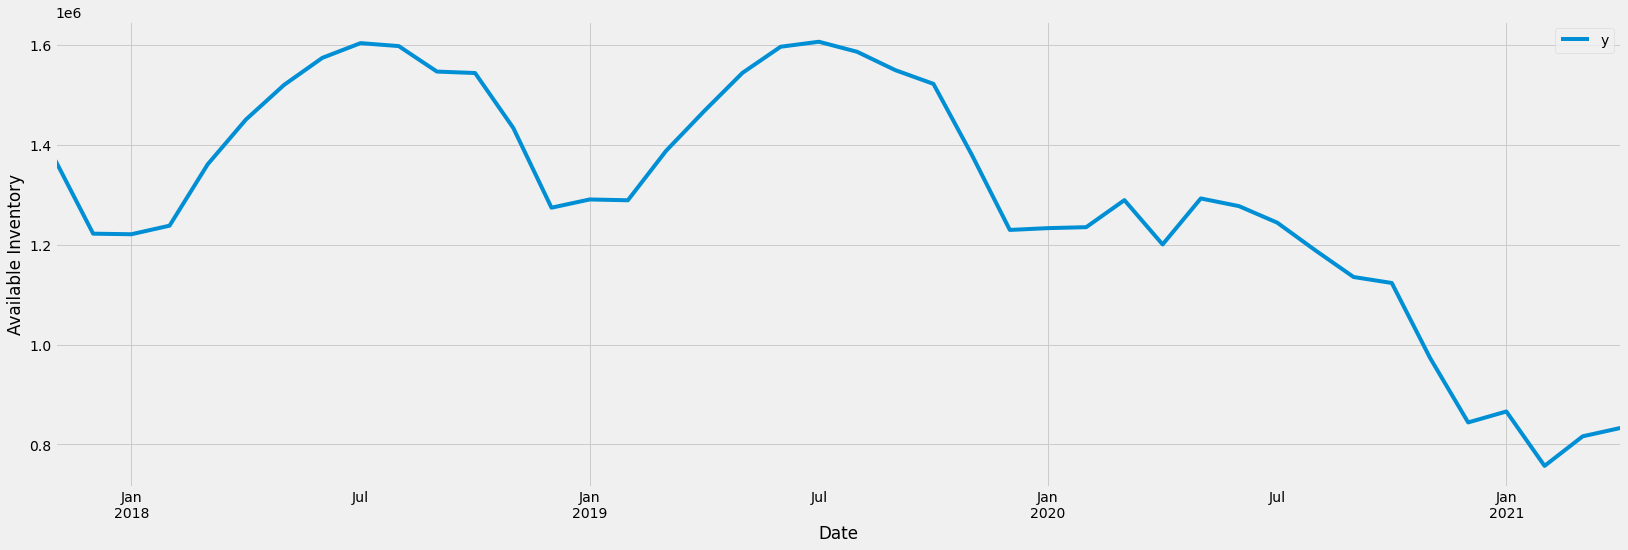

In [ ]:
#US Inventory 2017 - 2021
ax = df1lall.set_index('ds').plot(figsize=(25, 8))
ax.set_ylabel('Available Inventory')
ax.set_xlabel('Date')

plt.show()

## Median

In [ ]:
# SCRUB
# Rename columns for prophet
#del df1lall

df2lall = pd.DataFrame(df2l[df2l.columns[df2l.columns.get_loc('102001')]])
df2lall.reset_index(inplace=True)

df2lall = df2lall.rename(index=str, columns={"index":"ds","102001": "y"})

df2lall.head()

,ds,y
0,2017-11-30,274500.0
1,2017-12-31,269900.0
2,2018-01-31,269900.0
3,2018-02-28,278000.0
4,2018-03-31,289000.0


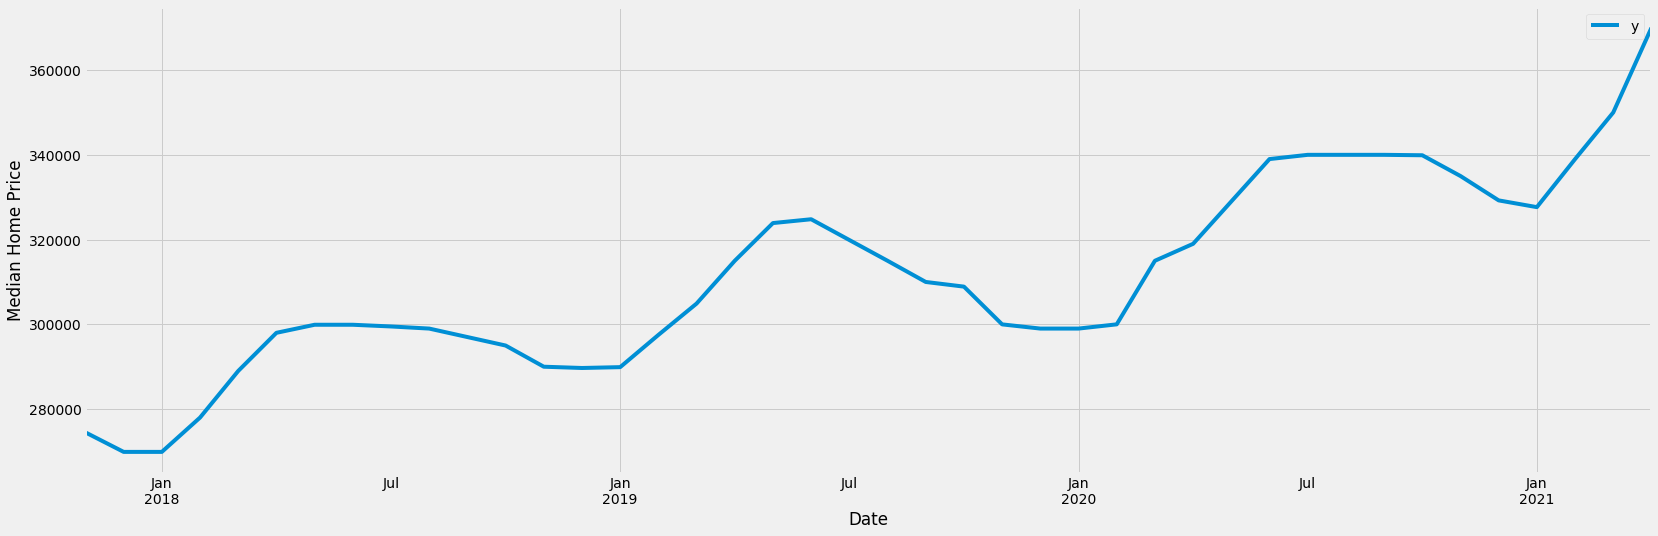

In [ ]:
#Median Home Price 2017 - 2021
ax = df2lall.set_index('ds').plot(figsize=(25, 8))
ax.set_ylabel('Median Home Price')
ax.set_xlabel('Date')

plt.show()

##Employment to Population Ratio 2001 - 2021

In [ ]:
# SCRUB
# Rename columns for prophet

df4 = df4.rename(index=str, columns={"em_EMRATIO": "y", "em_DATE": "ds"})
df4.head()

,ds,y
0,2001-04-01,64.0
1,2001-05-01,63.8
2,2001-06-01,63.7
3,2001-07-01,63.7
4,2001-08-01,63.2


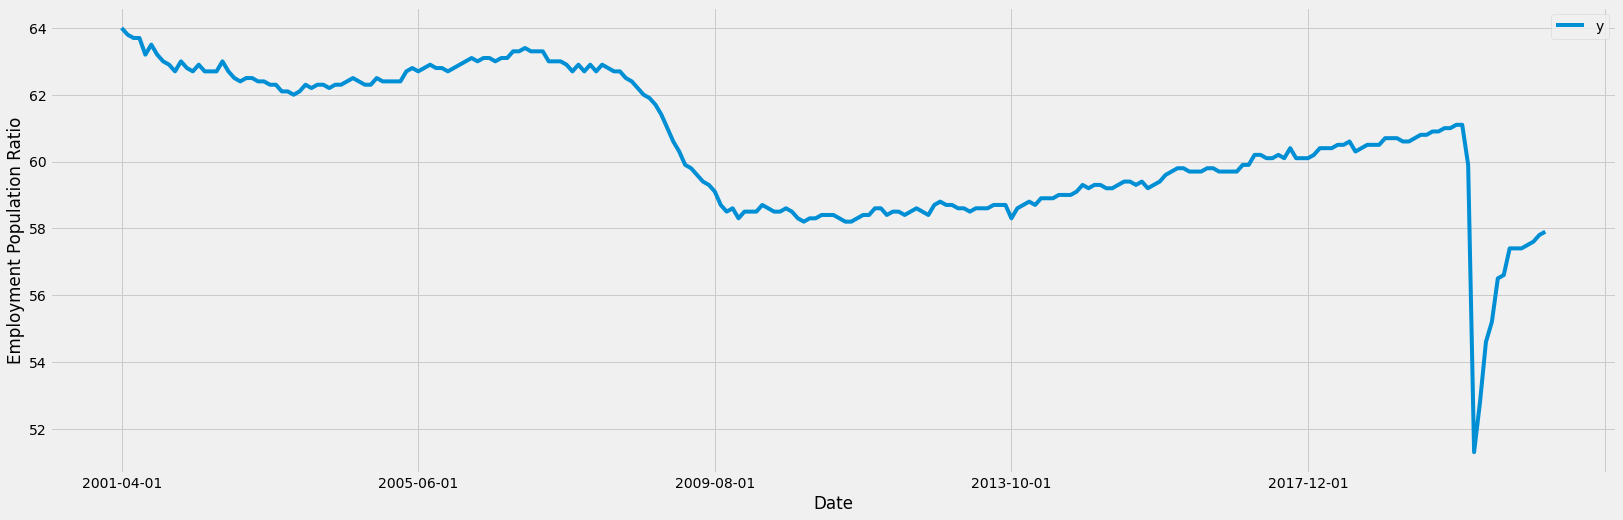

In [ ]:
#Employment to Population Ratio 2001 - 2021
ax = df4.set_index('ds').plot(figsize=(25, 8))
ax.set_ylabel('Employment Population Ratio')
ax.set_xlabel('Date')

plt.show()

##Unemployment Rate 2001 - 2021

In [ ]:
# SCRUB
# Rename columns for prophet

df5 = df5.rename(index=str, columns={"unem_UNRATE": "y", "unem_DATE": "ds"})
df5.head()

,ds,y
0,2001-04-01,4.4
1,2001-05-01,4.3
2,2001-06-01,4.5
3,2001-07-01,4.6
4,2001-08-01,4.9


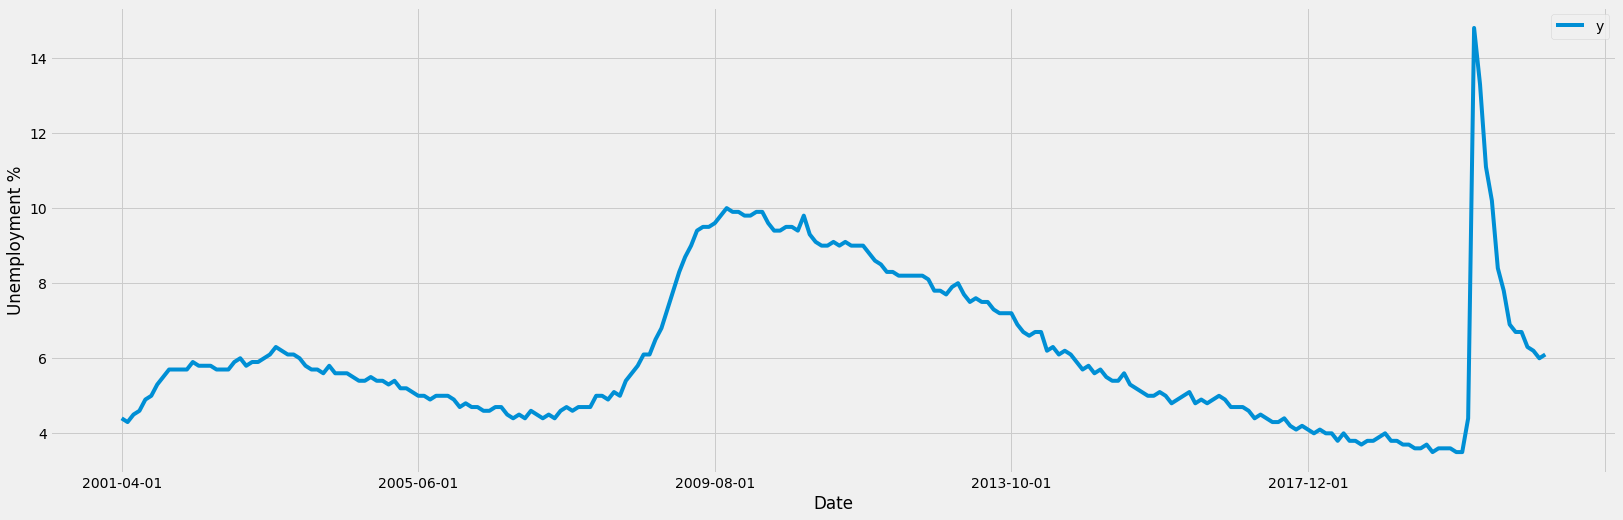

In [ ]:
#Unemployment Rate 2001 - 2021
ax = df5.set_index('ds').plot(figsize=(25, 8))
ax.set_ylabel('Unemployment %')
ax.set_xlabel('Date')

plt.show()

##15 Year Fixed Rate Mortgage 2001 - 2021

In [ ]:
# SCRUB
# Rename columns for prophet

df6 = df6.rename(index=str, columns={"15_MORTGAGE15US": "y", "15_DATE": "ds"})
df6.head()

,ds,y
0,2001-04-06,6.54
1,2001-04-13,6.55
2,2001-04-20,6.66
3,2001-04-27,6.63
4,2001-05-04,6.66


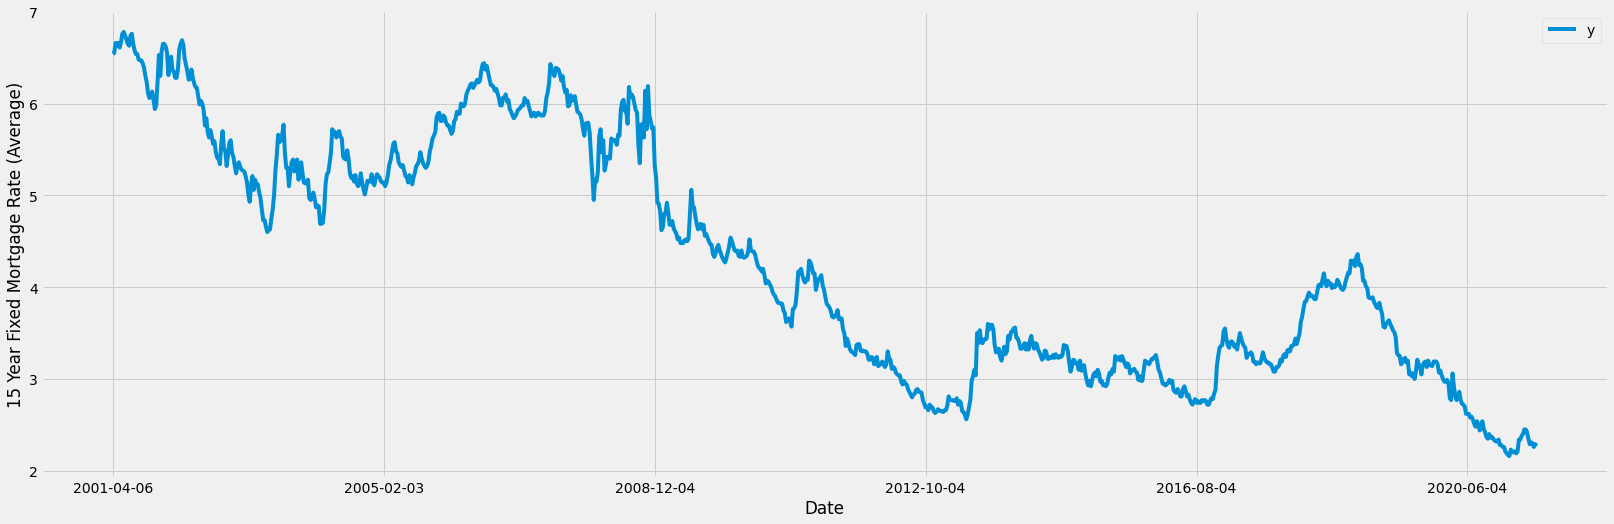

In [ ]:
#15 Year Fixed Rate Mortgage 2001 - 2021
ax = df6.set_index('ds').plot(figsize=(25, 8))
ax.set_ylabel('15 Year Fixed Mortgage Rate (Average)')
ax.set_xlabel('Date')

plt.show()

##30 Year Fixed Rate Mortgage 2001 - 2021

In [ ]:
# SCRUB
# Rename columns for prophet

df7 = df7.rename(index=str, columns={"30_MORTGAGE30US": "y", "30_DATE": "ds"})
df7.head()

,ds,y
0,2001-04-06,7.01
1,2001-04-13,7.04
2,2001-04-20,7.14
3,2001-04-27,7.12
4,2001-05-04,7.14


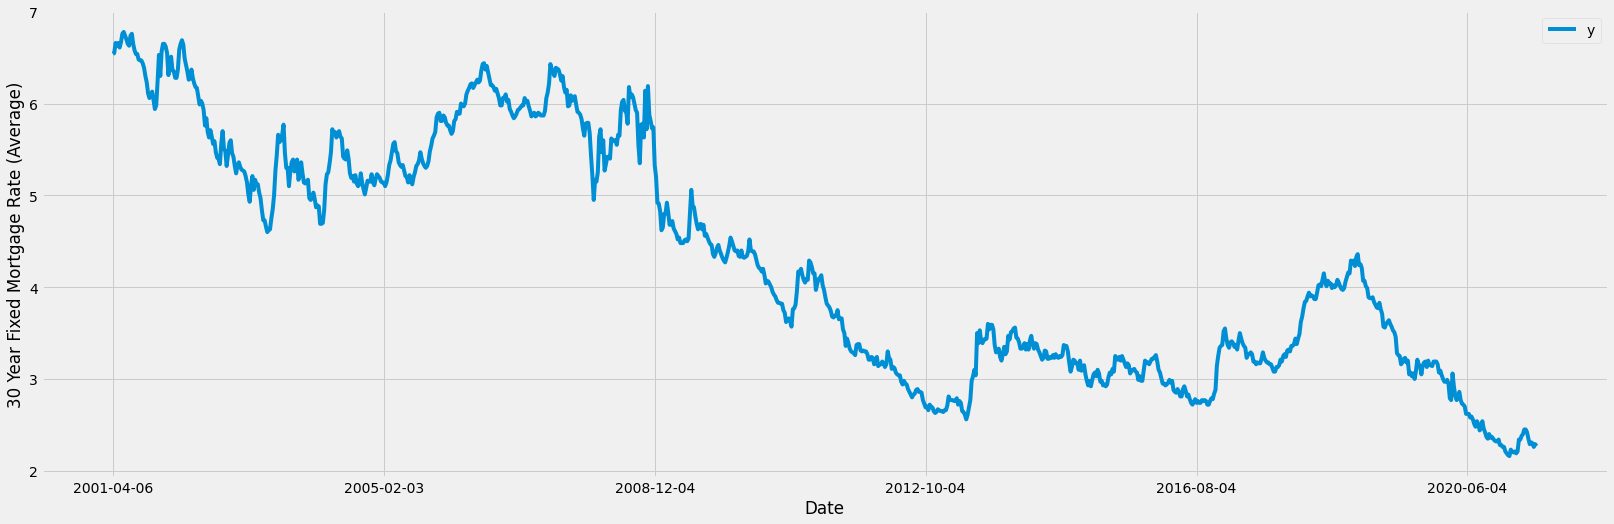

In [ ]:
#30 Year Fixed Rate Mortgage 2001 - 2021
ax = df6.set_index('ds').plot(figsize=(25, 8))
ax.set_ylabel('30 Year Fixed Mortgage Rate (Average)')
ax.set_xlabel('Date')

plt.show()

# Model Building

In [ ]:
# Prophet MODEL - Inventory
# Set the uncertainty interval to 95% (the Prophet default is 80%)

Invall_model = Prophet(interval_width=0.95)
Invall_model.fit(df1lall)

# 15YR Future Dates
future_dates = Invall_model.make_future_dataframe(periods=12, freq='M')
future_dates.tail()

#Forecast
forecast = Invall_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
49,2021-12-31,420078.066996,355597.235224,488225.101639
50,2022-01-31,409128.012261,334568.195481,488803.784754
51,2022-02-28,366319.001444,289461.204013,454196.007825
52,2022-03-31,430219.517623,347111.419064,520826.095416
53,2022-04-30,454142.108382,360746.275839,561557.598843


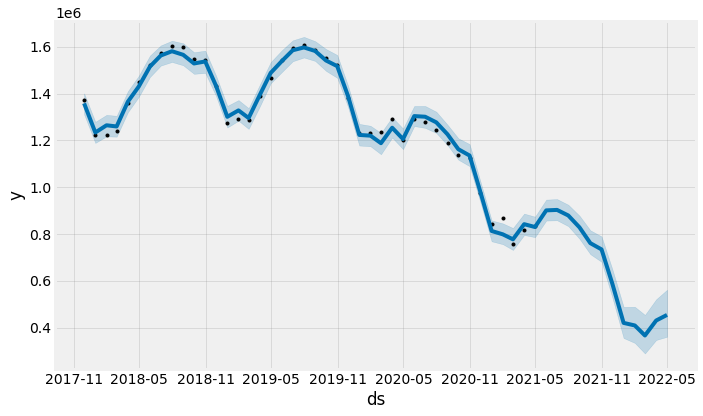

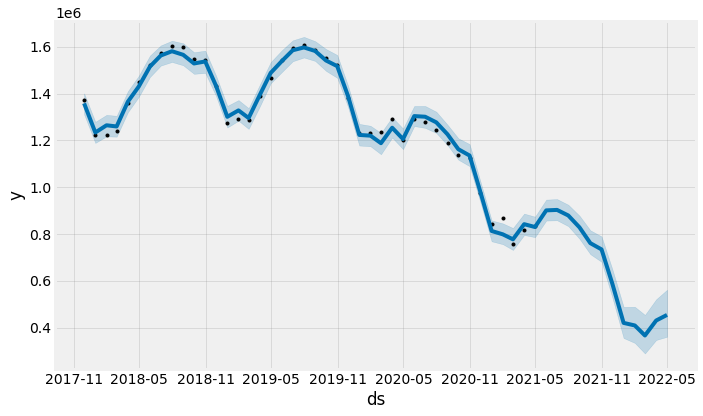

In [ ]:
# Inventory Forecase MODEL Plot

Invall_model.plot(forecast, uncertainty=True)

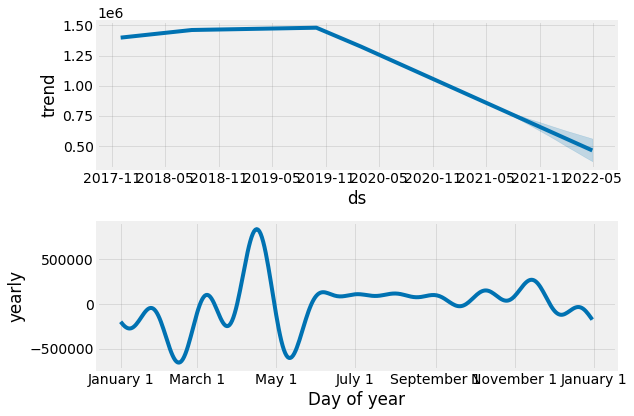

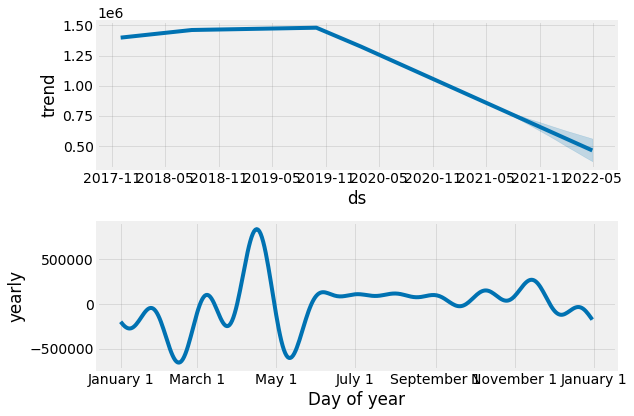

In [ ]:
# INTERPRET

Invall_model.plot_components(forecast)

In [ ]:
# Prophet MODEL - Median
# Set the uncertainty interval to 95% (the Prophet default is 80%)

Medall_model = Prophet(interval_width=0.95)
Medall_model.fit(df2lall)

# 15YR Future Dates
future_dates = Medall_model.make_future_dataframe(periods=12, freq='M')
future_dates.tail()

#Forecast
forecast = Medall_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
49,2021-12-31,371669.030010,362402.289990,380898.153069
50,2022-01-31,372919.630830,363084.615725,383384.269019
51,2022-02-28,381865.638208,370089.298354,394018.944574
52,2022-03-31,394001.400122,379735.750122,407799.868355
53,2022-04-30,407381.776417,392391.832273,423208.368685


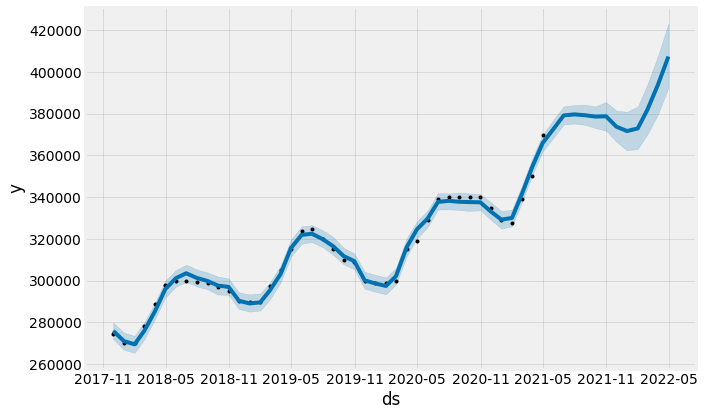

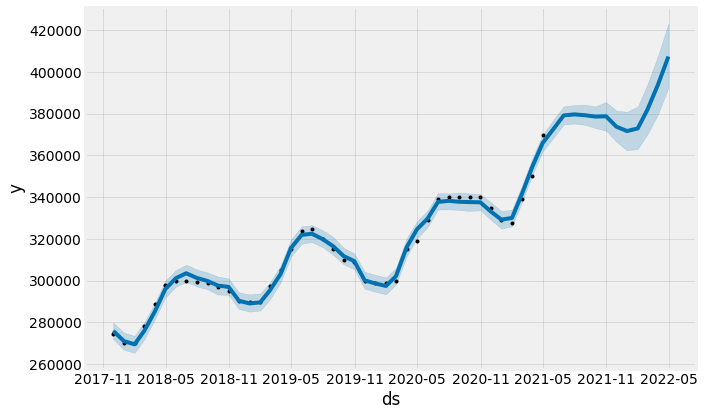

In [ ]:
# Median Forecase MODEL Plot

Medall_model.plot(forecast, uncertainty=True)

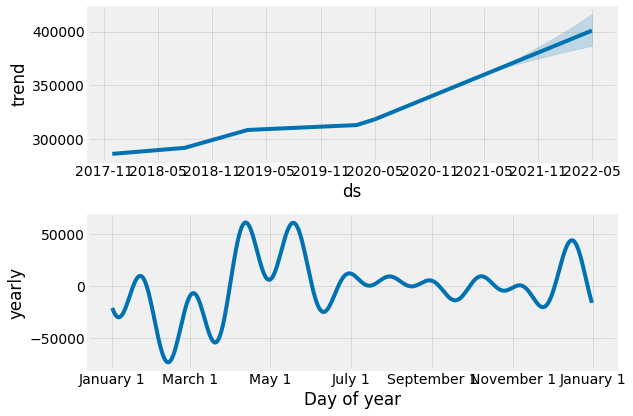

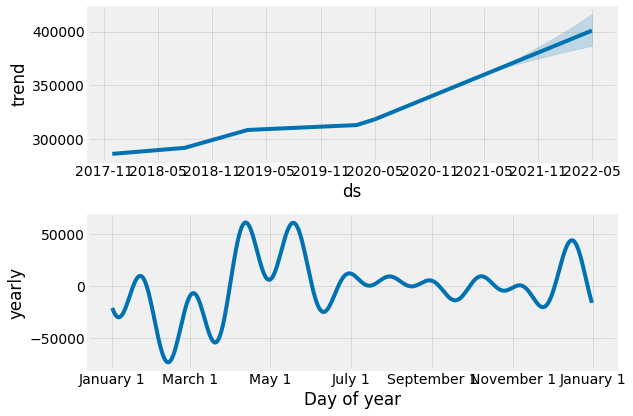

In [ ]:
# INTERPRET

Medall_model.plot_components(forecast)

In [ ]:
# Prophet MODEL - Employment to Population
# Set the uncertainty interval to 95% (the Prophet default is 80%)

Emp2Pop_model = Prophet(interval_width=0.95)
Emp2Pop_model.fit(df4)

# 15YR Future Dates
future_dates = Emp2Pop_model.make_future_dataframe(periods=12, freq='M')
future_dates.tail()

#Forecast
forecast = Emp2Pop_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

NameError: ignored

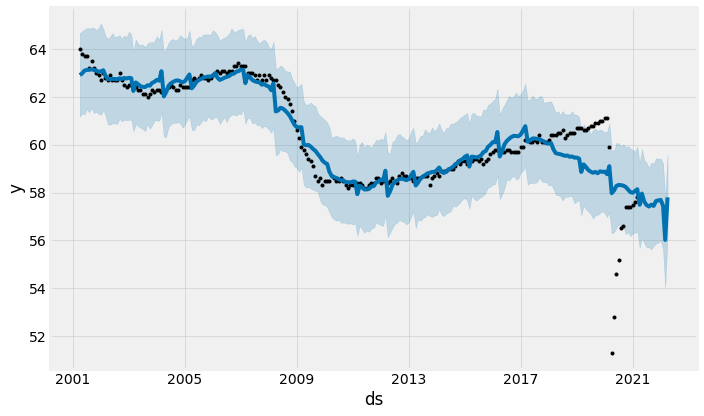

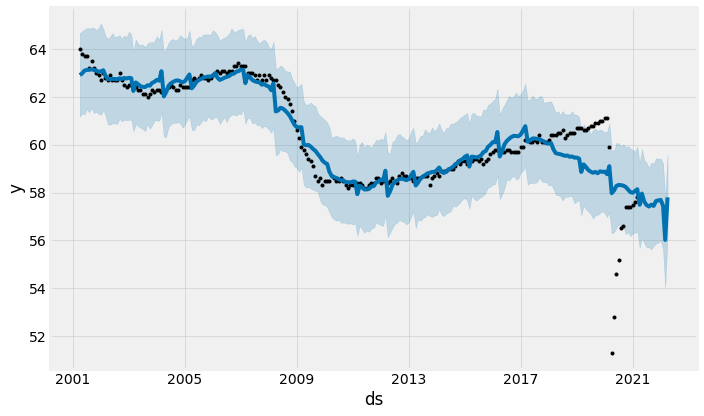

In [ ]:
# Emp2Pop Forecase MODEL Plot

Emp2Pop_model.plot(forecast, uncertainty=True)

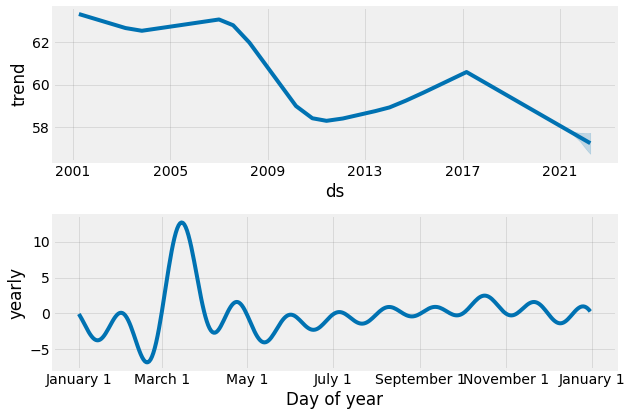

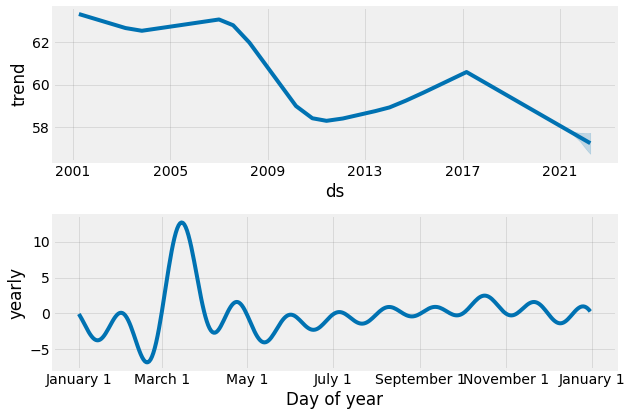

In [ ]:
# INTERPRET

Emp2Pop_model.plot_components(forecast)

In [ ]:
# Prophet MODEL - Unemployment Rate
# Set the uncertainty interval to 95% (the Prophet default is 80%)

Unemp_model = Prophet(interval_width=0.95)
Unemp_model.fit(df5)

# 15YR Future Dates
future_dates = Unemp_model.make_future_dataframe(periods=12, freq='M')
future_dates.tail()

#Forecast
forecast = Unemp_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
248,2021-11-30,4.332805,0.800042,7.346892
249,2021-12-31,4.242970,0.898426,7.479696
250,2022-01-31,4.239127,1.009184,7.688821
251,2022-02-28,4.873285,1.794102,8.139862
252,2022-03-31,4.475998,1.294660,7.761847


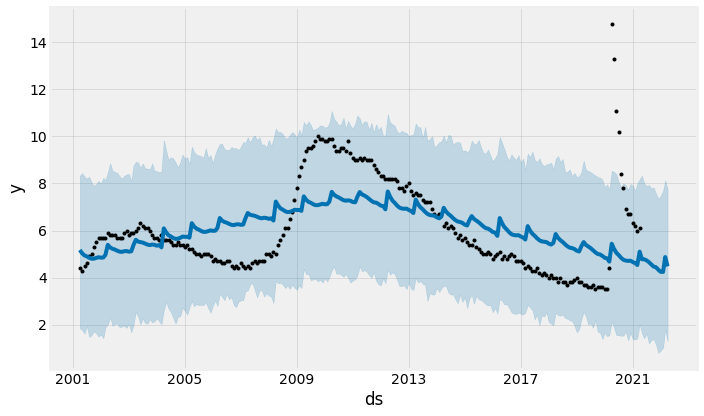

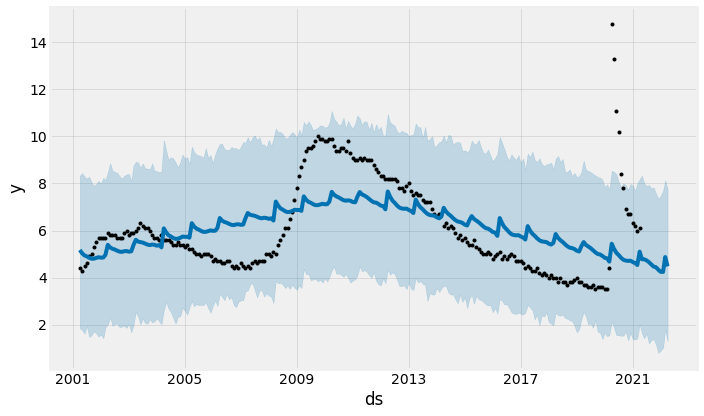

In [ ]:
# Unemp Forecase MODEL Plot

Unemp_model.plot(forecast, uncertainty=True)

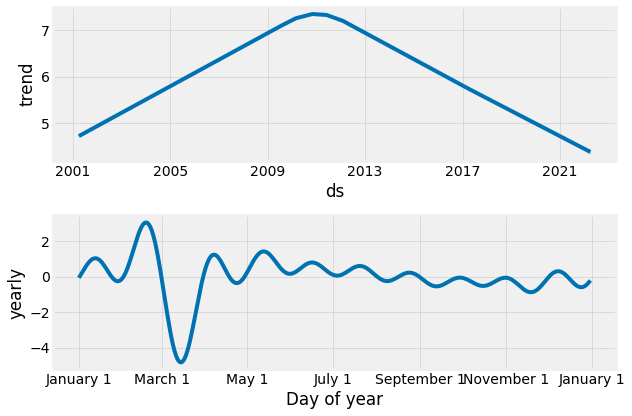

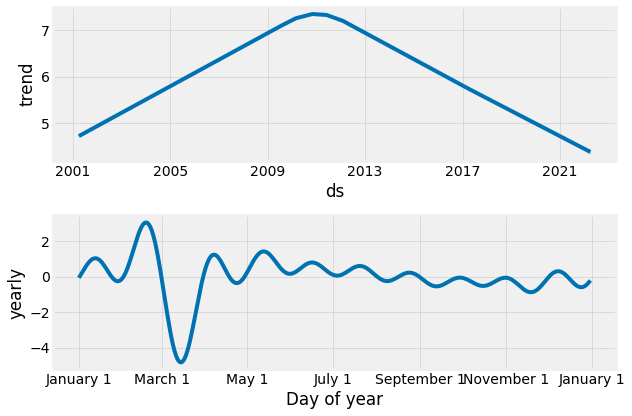

In [ ]:
# INTERPRET

Unemp_model.plot_components(forecast)

In [ ]:
# Prophet MODEL - 15YR
# Set the uncertainty interval to 95% (the Prophet default is 80%)

FifteenYR_model = Prophet(interval_width=0.95)
FifteenYR_model.fit(df6)

# 15YR Future Dates
future_dates = FifteenYR_model.make_future_dataframe(periods=52, freq='W')
future_dates.tail()

#Forecast
forecast = FifteenYR_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
1099,2022-04-24,2.273888,1.632146,2.922065
1100,2022-05-01,2.268542,1.598464,2.935089
1101,2022-05-08,2.261532,1.553699,2.914727
1102,2022-05-15,2.256101,1.569003,2.902854
1103,2022-05-22,2.257612,1.567678,2.938768


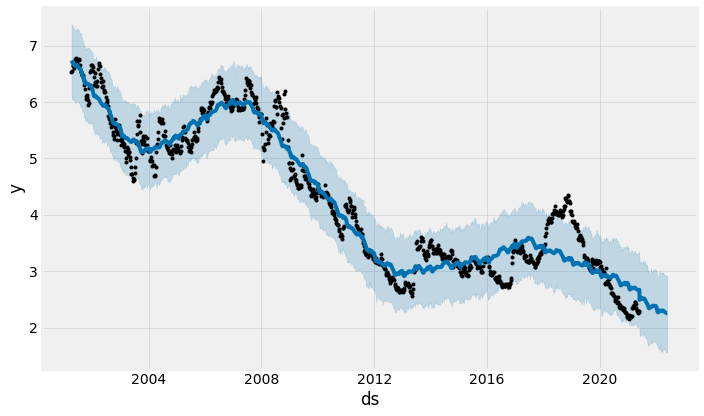

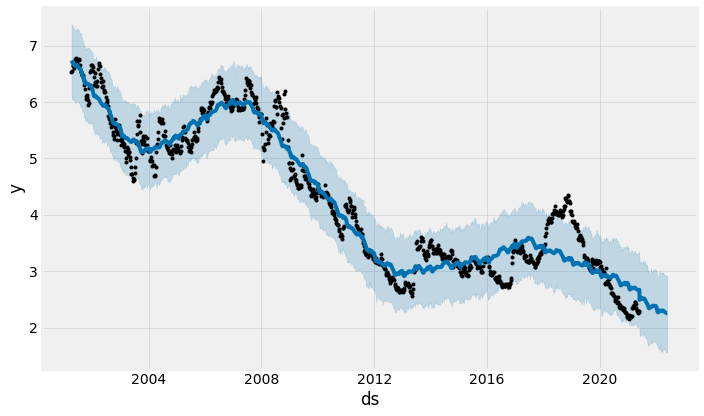

In [ ]:
# 15YR Forecase MODEL Plot

FifteenYR_model.plot(forecast, uncertainty=True)

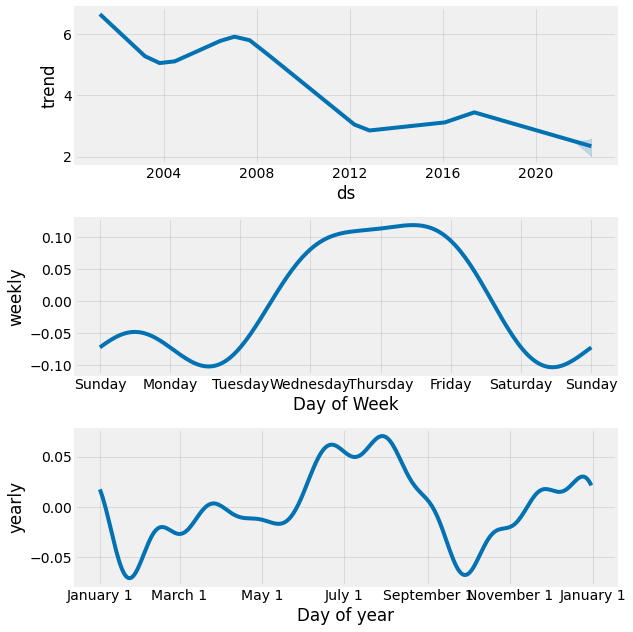

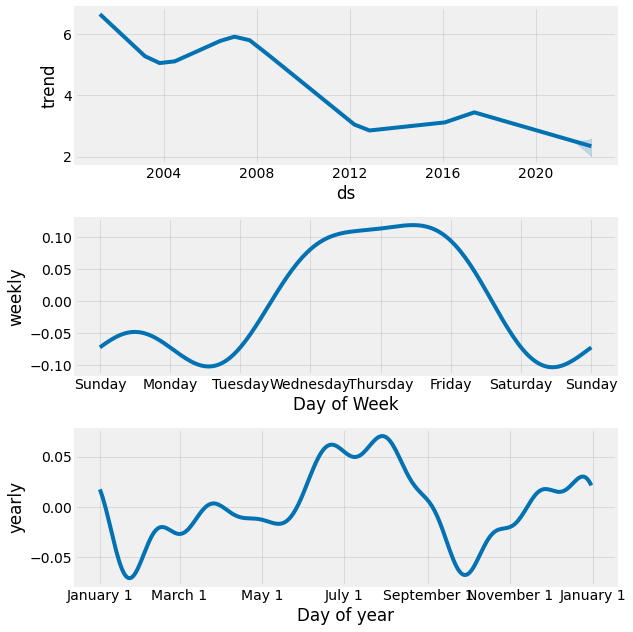

In [ ]:
# INTERPRET

FifteenYR_model.plot_components(forecast)

In [ ]:
# Prophet MODEL - 30YR
# Set the uncertainty interval to 95% (the Prophet default is 80%)

ThirtyYR_model = Prophet(interval_width=0.95)
ThirtyYR_model.fit(df7)

# 15YR Future Dates
future_dates = ThirtyYR_model.make_future_dataframe(periods=52, freq='W')
future_dates.tail()

#Forecast
forecast = ThirtyYR_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
1099,2022-04-24,2.773872,2.069457,3.438740
1100,2022-05-01,2.766473,2.118589,3.448470
1101,2022-05-08,2.757107,2.037469,3.482103
1102,2022-05-15,2.750624,2.096280,3.409062
1103,2022-05-22,2.751395,2.097750,3.507836


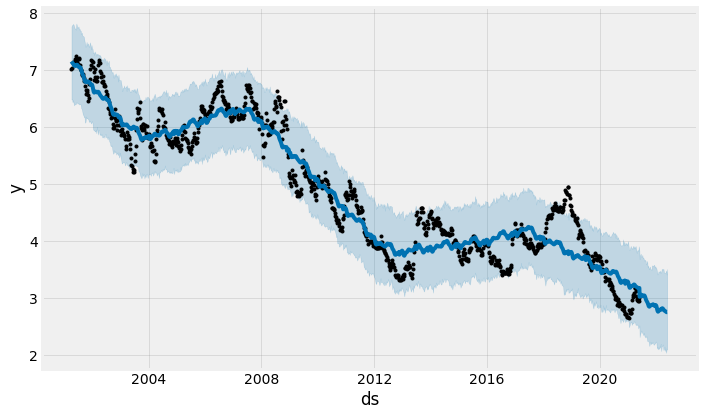

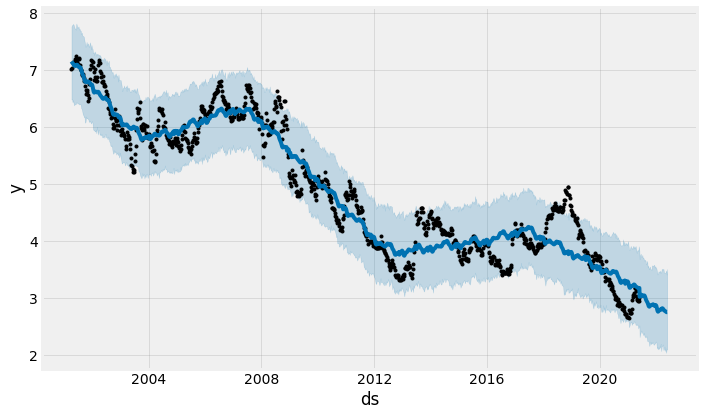

In [ ]:
# 30YR Forecase MODEL Plot

ThirtyYR_model.plot(forecast, uncertainty=True)

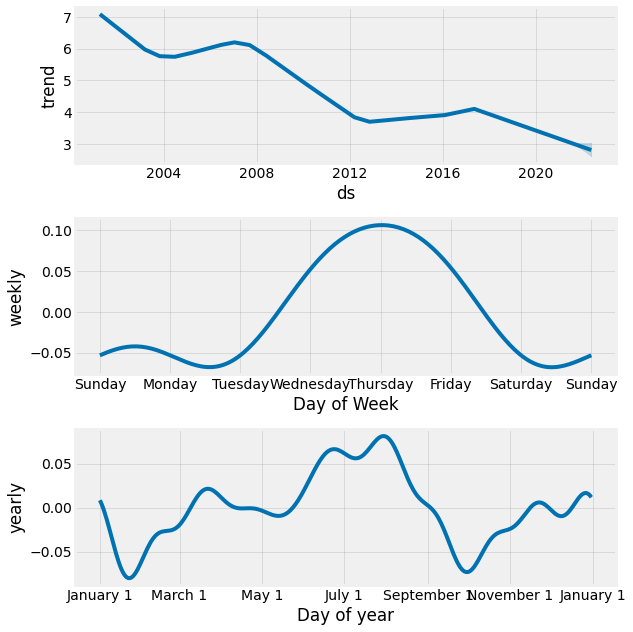

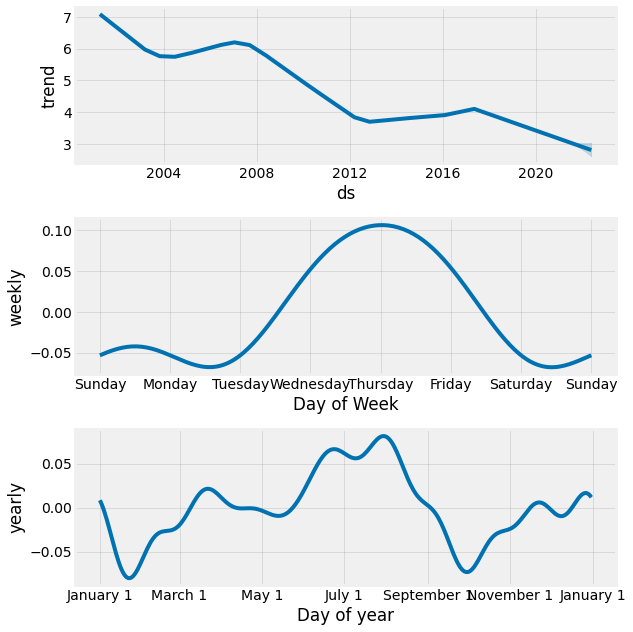

In [ ]:
# INTERPRET

ThirtyYR_model.plot_components(forecast)

## Visualizations

In [ ]:
df_map.head()

,RegionID,Zip1,State_x,City_x,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,...,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,Zip,City_y,State_y,Latitude,Longitude,Timezone,Daylight savings time flag,"geopoint,"
1,84654,60657,IL,Chicago,364892.0,364162.0,363605.0,362963.0,361660.0,361342.0,360662.0,361804.0,363561.0,366592.0,370077.0,372842.0,376806.0,380122.0,384081.0,385663.0,389062.0,389359.0,390182.0,388087.0,385729.0,381688.0,377848.0,376493.0,374914.0,375094.0,375012.0,378067.0,380789.0,386605.0,392801.0,400292.0,408057.0,416827.0,425087.0,432120.0,...,958371.0,961171.0,960878.0,957985.0,958428.0,964051.0,969547.0,968807.0,968566.0,969572.0,972936.0,973010.0,972447.0,972684.0,975094.0,978629.0,981362.0,979667.0,976810.0,975419.0,975366.0,975741.0,974693.0,975616.0,975734.0,975251.0,974238.0,973104.0,971908.0,972038.0,973671.0,975642.0,60657,Chicago,IL,41.940832,-87.65852,-6.0,1.0,"41.940832,-87.65852"
3,91982,77494,TX,Katy,200475.0,200723.0,200526.0,199337.0,198200.0,197534.0,198298.0,197986.0,197333.0,196543.0,197444.0,199129.0,201687.0,202931.0,204207.0,206413.0,208870.0,210582.0,210250.0,212394.0,214904.0,217109.0,216177.0,214468.0,211736.0,210126.0,208420.0,207481.0,206443.0,206033.0,205925.0,204647.0,204133.0,204600.0,206225.0,207084.0,...,331356.0,331165.0,331177.0,331223.0,332171.0,333159.0,333470.0,333247.0,333699.0,334667.0,335386.0,335194.0,335478.0,335777.0,336150.0,336558.0,336390.0,336776.0,336806.0,336869.0,336217.0,335679.0,335536.0,335878.0,335940.0,336092.0,336119.0,336083.0,336154.0,335860.0,336037.0,336483.0,77494,Katy,TX,29.760833,-95.81104,-6.0,1.0,"29.760833,-95.81104"
4,84616,60614,IL,Chicago,546663.0,546231.0,545451.0,545391.0,543066.0,543084.0,542380.0,545254.0,548142.0,552660.0,557791.0,562238.0,566446.0,569659.0,573409.0,575403.0,581567.0,584316.0,587753.0,585957.0,583932.0,580996.0,578241.0,578355.0,580711.0,585527.0,591659.0,597955.0,604759.0,611702.0,620591.0,630536.0,643350.0,654584.0,665638.0,674824.0,...,1192626.0,1196983.0,1199400.0,1199387.0,1202485.0,1208903.0,1213170.0,1209707.0,1207080.0,1206948.0,1208617.0,1208706.0,1208528.0,1209725.0,1211606.0,1214779.0,1216093.0,1212725.0,1208171.0,1206835.0,1207121.0,1208395.0,1207765.0,1208853.0,1208481.0,1206304.0,1204013.0,1201182.0,1198879.0,1198277.0,1199900.0,1200980.0,60614,Chicago,IL,41.922682,-87.65432,-6.0,1.0,"41.922682,-87.65432"
5,91940,77449,TX,Katy,97521.0,97513.0,97471.0,97491.0,97486.0,97458.0,97414.0,97487.0,97621.0,97626.0,97672.0,97755.0,97543.0,97263.0,97003.0,97138.0,97277.0,97514.0,97700.0,97747.0,97753.0,97983.0,98353.0,98624.0,99216.0,99691.0,100179.0,100044.0,100025.0,99914.0,99963.0,100017.0,100156.0,100335.0,100171.0,100043.0,...,171457.0,171930.0,172683.0,173177.0,173594.0,174118.0,174705.0,175248.0,176243.0,177155.0,177923.0,178307.0,178962.0,179831.0,180581.0,180987.0,181494.0,182598.0,183676.0,184144.0,183869.0,183889.0,184389.0,185268.0,185951.0,186457.0,187057.0,187978.0,188925.0,189522.0,190210.0,191469.0,77449,Katy,TX,29.825908,-95.73010,-6.0,1.0,"29.825908,-95.7301"
7,91733,77084,TX,Houston,97381.0,97405.0,97330.0,97323.0,97280.0,97261.0,97134.0,97089.0,97111.0,97145.0,97181.0,97205.0,96895.0,96481.0,96141.0,96098.0,96112.0,96101.0,96197.0,96209.0,96207.0,96265.0,96469.0,96676.0,97275.0,97791.0,98282.0,98270.0,98282.0,98292.0,98392.0,98459.0,98548.0,98625.0,98468.0,

In [ ]:
import plotly.express as px
fig = px.density_mapbox(df_map, lat='Latitude', lon='Longitude', z='2020-03-31', radius=10, mapbox_style="stamen-terrain")
fig.show()

# References
  * https://www.zillow.com/research/data/
  * https://fred.stlouisfed.org/series/MORTGAGE15US
  * https://fred.stlouisfed.org/series/MORTGAGE30US
  * https://fred.stlouisfed.org/series/UNRATE
  * https://fred.stlouisfed.org/series/EMRATIO
  * https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/export/